# Video Games Sales Analysis

We have received historical data on video games sales from the online store Ice. This data includes extensive information on popular games, including sales numbers from varios geographical regions, expert reviews, and Entertainment Software Rating Board (ESRB) ratings. Using this information, we will attempt to identify patterns that determine whether a game succeeds or not; this information will allow us to spot potential 'hit' games and plan advertisement campaigns accordingly. This analysis is conducted with the overall goal of planning an effective advertisement campaign for 2017. 

Table of Contents:
* [1 Data Preprocessing](#1)
    * [1.1 Import Relevant Libraries](#1.1)
    * [1.2 Read Data to DataFrame](#1.2)
    * [1.3 Set Strings to Lower Case](#1.3)
    * [1.4 Check for Duplicates](#1.4)
    * [1.5 Change Data Types](#1.5)
        * [1.5.1 Change Release Year Values to Integer](#1.5.1)
        * [1.5.2 Change User Score Values to Float](#1.5.2)
    * [1.6 Categorize Data](#1.6)
    * [1.7 Deal with Missing Values](#1.7)
        * [1.7.1 Get Total Number of NaNs in Each Column](#1.7.1)
        * [1.7.2 Examine Missing Values in 'name' Column](#1.7.2)
        * [1.7.3 Examine Missing Values in 'year_of_release' Column](#1.7.3)
        * [1.7.4 Examine Missing Values in 'rating' Column](#1.7.4)
        * [1.7.5 Examine Missing Values in 'critic_score' Column](#1.7.5)
        * [1.7.6 Examine Missing Values in 'user_score' Column](#1.7.6)
        * [1.7.7 Dealing With Missing Values - Conclusion](#1.7.7)
    * [1.8 Add Total Sales Data to DataFrame](#1.8)
    * [1.9 Section Summary](#1.9)
* [2 Exploratory Data Analysis](#2)
    * [2.1 Analysis of Games Released per Year](#2.1)
    * [2.2 Analysis of Sales from Games Sold by Platform](#2.2)
         * [2.2.1 Visualize Total Sales for Each Platform](#2.2.1)
         * [2.2.2 Visualize Yearly Total Sales for Playstation 2](#2.2.2)
         * [2.2.3 Visualize Yearly Game Sales for 10 Most Popular Platforms](#2.2.3)
         * [2.2.4 Calculate the Average Lifespan of a Console](#2.2.4)
    * [2.3 Intermediate Conclusion - Choosing Data Subset](#2.3)
    * [2.4 Current Platform Trends](#2.4)
         * [2.4.1 Visualize Yearly Game Sales for Each Platform](#2.4.1)
         * [2.4.2 Create Boxplot to Visualize Global Game Sales by Platform](#2.4.2)
         * [2.4.3 Test Significance of Difference Between Playstation Vita and Xbox 360](#2.4.3)
             * [2.4.3.1 Calculate Measures of Location for 'total_sales' Values](#2.4.3.1)
             * [2.4.3.2 Formulate Null and Alternative Hypotheses](#2.4.3.2)
             * [2.4.3.3 Test the Null Hypothesis](#2.4.3.3)
    * [2.5 Examination of Possible Affect of Reviews on Game Sales](#2.5)
         * [2.5.1 Determine Which Console has the Greatest Number of Reviews](#2.5.1)
         * [2.5.2 Obtain Data Subset for Playstation 4](#2.5.2)
         * [2.5.3 Obtain Pearson Correlation Coefficient for Reviews](#2.5.3)
         * [2.5.4 Visualize the Data Using Scatterplots](#2.5.4)
         * [2.5.5 Correlation Conclusion](#2.5.5)
    * [2.6 Examine Sales of Cross-Platform Games](#2.6)
         * [2.6.1 Create Subset DataFrame](#2.6.1)
         * [2.6.2 Visualize Data With Boxplot](#2.6.2)
         * [2.6.3 Calculate Revenue for Cross-Platform Games in Relation to Playstaion 4](#2.6.3)
         * [2.6.4 Cross-Platform Games Conclusion](#2.6.4)
    * [2.7 Examine Distribution of Games by Genre](#2.7)
         * [2.7.1 Visualize Distribution of Games by Genre](#2.7.1)
         * [2.7.2 Visualize Game Sales Revenue by Genre](#2.7.2)
         * [2.7.3 Calculate Total Revenue Generated by Genre](#2.7.3)
         * [2.7.4 Revenue by Genre Conclusion](#2.7.4)
    * [2.8 Exploratory Data Analysis Conclusion](#2.8)
* [3 Regional User Profiles](#3)
    * [3.1 Platform Popularity by Region](#3.1)
        * [3.1.1 North American Platform Popularity](#3.1.1)
        * [3.1.2 European Platform Popularity](#3.1.2)
        * [3.1.3 Japanese Platform Popularity](#3.1.3)
        * [3.1.4 Regional Platform Popularity Conclusion](#3.1.4)
    * [3.2 Genre Popularity by Region](#3.2)
        * [3.2.1 North American Genre Popularity](#3.2.1)
        * [3.2.2 European Genre Popularity](#3.2.2)
        * [3.2.3 Japanese Genre Popularity](#3.2.3)
        * [3.2.4 Regional Genre Popularity Conclusion](#3.2.4)
    * [3.3 Regional Sales by ESRB Rating](#3.3)
        * [3.3.1 Fill in NaNs for ESRB Ratings](#3.3.1)
        * [3.3.2 Visualize Game Sales Revenue by Rating for Each Region](#3.3.2)
        * [3.3.3 Regional Sales by ESRB Rating Conclusion](#3.3.3)
    * [3.4 Regional User Profiles Conclusions](#3.4)
* [4 Hypothesis Testing](#4)
    * [4.1 Obtain DataFrame Slices](#4.1)
        * [4.1.1 Obtain DataFrame Slices for Platform Comparison](#4.1.1)
        * [4.1.2 Obtain DataFrame Slices for Genre Comparison](#4.1.2)
    * [4.2 Create Funtion to Test Hypotheses](#4.2)
    * [4.3 Testing Hypothesis 1](#4.3)
    * [4.4 Testing Hypothesis 2](#4.4)
    * [4.5 Hypothesis Testing Conclusion](#4.5)
* [5 Conclusion](#5)

## Data Preprocessing <a class="anchor" id='1'></a>

### Import Relevant Libraries<a class="anchor" id='1.1'></a>

In [24]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from statistics import mean
import time
import warnings
warnings.filterwarnings('ignore')

### Read Data to DataFrame<a class="anchor" id='1.2'></a>

In [25]:
games = pd.read_csv('/datasets/games.csv')
print(games.info())
print()
print("Sample of DataFrame:")
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Sample of DataFrame:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


1.2 Notes: By calling the info() method on the 'games' DataFrame, we see it contains 11 columns, 5 of which are of the object data type, and 6 of which are of the float64 data type. To better work with the values in the 'User_Score' column, we will change the data type later on to float. We will also change the data type of the 'Year_of_Release' column to int.

From the information on the 'games' DataFrame, we can also see that there are plenty of NaN values dispersed throughout. We will revisit the NaNs in a later section and decide how to deal with them. 

### Set Strings to Lower Case<a class="anchor" id='1.3'></a>

In [26]:
#Set all string values in the DataFrame to lower case.
games = games.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

#Set the column names to lower case.
games.columns = games.columns.str.lower()

#Display the first 5 lines to see if changes were properly made.
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


1.3 Notes: In this subsection, we have set all string values in the DataFrame to lower case. While this is not a stricly necessary step, we have decided to do so in order to avoid potential issues that non-unified casing can cause down the line. For example, it might be the case that there are two different rows for a particular game, one with the game's name in all lower case, and another with the name starting with a capital letter. When we check for duplicates to get rid of such rows, the computer would not recognize these rows as duplicated given their different casing. Given this, and similar concerns, we decided to make all strings lowercase.

### Check for Duplicates<a class="anchor" id='1.4'></a>

In [27]:
print("There are {} duplicated rows in this DataFrame.".format(games.duplicated().sum()))

There are 0 duplicated rows in this DataFrame.


1.4 Notes: There appear to be no complete duplicates in this DataFrame - that is, no two rows contain exactly the same values for each column.

### Change Data Types<a class="anchor" id='1.5'></a>

#### Change Release Year Values to Integer<a class="anchor" id='1.5.1'></a>

In [28]:
#Change year_of_release data type to int. Fills NaNs with -1.
games['year_of_release'] = games['year_of_release'].fillna(-1).astype(int)

#### Change User Score Values to Float<a class="anchor" id='1.5.2'></a>

In [29]:
#Get value_count for user_score to determine if there are odd values.
print(games['user_score'].value_counts(dropna=False))

#Replace 'tbd' and NaNs with -1, then convert the data type to float.
games['user_score'] = games['user_score'].replace('tbd', -1).fillna(-1).astype('float')

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.9       2
0.2       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64


1.5 Notes: In this subsection we changed the data types for two columns. We first changed the data type for year_of_release values to int, filling the NaNs with -1. This will allow us to use year_of_release as a discrete variable in our later analyses. We also changed the data type for user_score from object to float. We initally ran into a problem when trying to do the conversion, as there were a few NaNs and cells that contained the string 'tbd'. In order to carry out the conversion, we replaced all instances of 'tbd' with -1, filled the NaNs with -1, and finally called the astype method. 

### Categorize Data<a class="anchor" id='1.6'></a>

After reviewing some of the values in the DataFrame, we noticed that there was an outdated value in the 'rating' column - that is, some games were rated k-a, which was once the ESRB's rating for 'kids through adults'. After 1998, the ESRB replaced the k-a rating with e for 'everyone'. Given this change in classification, we will replace the old ratings with their new label.

In [30]:
games['rating'] = games['rating'].replace('k-a', 'e')

### Deal With Missing Values<a class="anchor" id='1.7'></a>

#### Get Total Number of NaNs in Each Column<a class="anchor" id='1.7.1'></a>

In [31]:
print(games.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64


1.7.1 Notes: From the above count, we can see that there are NaN values in the 'name', 'genre', 'critic_score', and 'rating' columns; given that we used -1 as a place holder for missing values in the previous section, it's important to recognize that the 'user_score' and 'year_of_release' columns also have missing values. 

#### Examine Missing Values in 'name' Column<a class="anchor" id='1.7.2'></a>

In [32]:
#Print rows where value in 'name' column is NaN. 
display(games.loc[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


In [33]:
#Drop rows with NaNs in 'name' and 'genre' column if it constitutes less that 1% of data.
if (len(games.loc[games['name'].isnull()]) / len(games)) < .01 :
    print("Rows with NaNs in 'name' & 'genre' columns constitute less than 1% of the data.")
    print("\nDropping rows from DataFrame")
    #Drop NaN rows & reset the index.
    games.dropna(subset=['name'], inplace=True)
    games.reset_index(inplace=True, drop=True)
else: 
    print("Rows with NaNs in 'name' & 'genre' columns constitute more than 1% of the data.")
    print("We will try to replace the NaNs with other values.")

Rows with NaNs in 'name' & 'genre' columns constitute less than 1% of the data.

Dropping rows from DataFrame


1.7.2 Notes: In examining the rows with NaNs in the 'name' column, we found that each row had NaN as their 'genre' column value. Since we saw that there were only 2 NaNs in the 'name' column and 2 in the 'genre' column, we can see that the rows returned represent all the rows with NaNs that show up for either column. 

Since our later analyses will be based on the metrics of each game and not on their name, we decided that we would not need to fill in the missing values for the 'name' column. However, seeing as how the rows with NaNs in that column also have NaN values for genre, critic score, user score, and rating, we determined that they will not be of much use to use in our analyses. As such, we wrote an if/else statement to drop the rows and reset the index if the rows represent less than 1% of the data, which turned out to be the case.

#### Examine Missing Values in 'year_of_release' Column<a class="anchor" id='1.7.3'></a>

In [34]:
#Find out how many values are missing in the 'year_of_release' column.
display(games.loc[games['year_of_release'] == -1].head(5))
print("There are {} rows with missing values for year_of_release.".format(len(games.loc[games['year_of_release'] == -1])))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,-1,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,-1,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,-1,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,-1,fighting,1.57,1.02,0.00,0.41,NaN,-1.0,NaN
609,space invaders,2600,-1,shooter,2.36,0.14,0.00,0.03,NaN,-1.0,NaN


There are 269 rows with missing values for year_of_release.


1.7.3 Note: From our count, we can see that there are 269 rows with missing values for 'year_of_release'. At first blush, it appears many of the games with no values for year_of_release are, or were, quite popular. Having checked Metacritic to see if certain critic scores line up with those in the DataFrame, which it appears they do, we have determined that likely explanations for the missing values are the game having different versions released and the game not being particularly popular. In case of the former, there may be many games that show up under the same, or similar title, on whichever database this information was gathered. In the latter case, the individual entering data may not have found it particularly important to enter that bit of information.

As the year a popular game was released will have an impact on our later analyses, it would be best to try and fill in the missing values with an approximate date. We believe that the best indicator of the approximate year a game was released is the console that the game was made for. Per a study at the University of Vienna by Gredler, Moravska, and Wegendt, game consoles typically have a 5-year lifecycle before they are replaced with a new console. Given this information, we can estimate the year a game was released with a narrow window. For the task at hand, we will replace missing year_of_release values with the median yea_of_release values for games of each specific console. 

In [35]:
#Replace missing values for year_of_release with the median year_of_release of games by console. 
games['year_of_release'] = games['year_of_release'].replace(-1, np.NaN)
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('platform')['year_of_release'].transform('median'))

#Check if all missing values were filled.
print("After attempting to replace missing values, there are now {} rows with missing values for year_of_release.".format(len(games.loc[games['year_of_release'] == -1])))

After attempting to replace missing values, there are now 0 rows with missing values for year_of_release.


#### Examine Missing Values in 'rating' Column<a class="anchor" id='1.7.4'></a>

In [36]:
#Check how many rows are missing values for 'rating'.
print("There are {} rows with missing values in the 'rating' column.".format(len(games.loc[games['rating'].isnull()])))

display(games.loc[games['rating'].isnull()].head(5))

There are 6764 rows with missing values in the 'rating' column.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN


1.7.4 Notes: Our count indicates that there are a substantial number of rows with missing values for 'rating'. We have determined that two likely reasons for these missing values are that the game was released before or around the year that the ESRB was established or the game developer did not pay for the ESRB rating. Regarding the former, the ESRB was established in September 1994; as such, games developed prior to that year, or before the ESRB was a well-established rating body, would likely not have received an ESRB rating. Regarding the latter scenario, the ESRB requires payment for a rating; some game developers may have opted not to obtain a rating. While this is not very common for mainstream games, it's important to note that acquiring an ESRB rating is voluntary, and while some companies require games to be ESRB rated before they can be carried/sold, others may not.

In any case, while we would like to fill these values, as rating is important to our later analyses, we will not do so until we have a better idea of the data that we will base our analyses on. As we are planning an advertisement campaign for 2017, we will likely drop rows where the platform listed is outdated. After doing so, we will more accurately be able to replace missing values in the 'rating' column.

#### Examine Missing Values in 'critic_score' Column<a class="anchor" id='1.7.5'></a>

In [37]:
#Print number of values missing for 'critic_score' column.
print("There are {} rows with missing values in the 'critic_score' column.".format(len(games.loc[games['critic_score'].isnull()])))

There are 8576 rows with missing values in the 'critic_score' column.


1.7.5 Note: As with rating, there are a substantial number of rows missing a value for 'critic_score'. As mentioned in an earlier subsection, we cross refrenced a number of the critic scores in this DataFrame with the scores on Metacritic and found that they are verry similar, if not the same. As such, we read through Metacritics FAQ page to determine why some games might have missing reviews. Per their response to the question "what does 'tbd' mean", it appears that Metacritic does not publicize reviews of a game unless at least 4 critic reviews have been logged in their database. Whether the data in this DataFrame was scraped from Metacritic or a similar rating site, the missing values for 'critic_score' may be explained by a simple lack of sufficient reviews for the relevant games. This lack of reviews may be explained by the game being released before reviewing became widespread, or perhaps because the particular game was not popular enough to garner critic attention.

While it would undoubtedly be useful to have critic scores for all games when analysing trends and attempting to predict which types of games would be most likely to generate large profits, we have decided to leave the NaNs in place, as we believe that it would be best to consider only those games for which scores are already present, rather than try to fill in the NaNs. This is because critic scores tend to fluctuate - for example, critic scores for movies on IMDB tend to be different from scores on Rotten Tomatoes. 

#### Examine Missing Values in 'user_score' Column<a class="anchor" id='1.7.6'></a>

In [38]:
#Print number of values missing for 'user_score' column.
games['user_score'] = games['user_score'].replace(-1, np.NaN)
print("There are {} rows with missing values in the 'user_score' column.".format(len(games.loc[games['user_score'].isnull()])))

There are 9123 rows with missing values in the 'user_score' column.


1.7.6 Notes: From our count, we can see that there are even more values missing from the 'user_score' column that are mising from the 'critic_score' and 'rating' columns. We assume, however, that the reasons for these missing values are similar to the reasons mentioned for the other columns. That is, the relevant games may have been released before individuals started rating games online, or the games may not have been popular enough to garner the requisite number of ratings to have a user rating appear on whichever database this information was acquired from. 

As with the missing values in 'critic_score', we have decided to leave these NaNs in place. We believe we would be able to get a better representation of how users' ratings relate to the success of a game if we use the ratings that are in place, rather than try to repalce the NaNs with user_ratings. While some might consider replacing 'user_score' values based on 'critic_score' values, we find two problems with this approach. First, a substantial portion of the rows with missing valies for 'user_score' also have missing values for 'critic_score'. Secondly, critic and user scores of games tend to differ substantially - for example, Metacritic's critic score for the game "Colors! 3D" is about 89, whereas the user score is 75.

#### Dealing With Missing Values - Conclusion<a class="anchor" id='1.7.7'></a>

In this subsection we turned our attention to missing values. The following are the columns we found with missing values, their NaN count, and an explanation of how we decided to deal with them:

* Name & Genre - We found that the 'name' and 'genre' columns both have 2 NaNs. Since the NaNs appear on the same two rows, we chose to deal with them simultaneously. Given that genre is important to our later analyses, it would have been best to fill in the NaNs fo genre; however, given the information, we do not believe we can accurately determine the genera by other measures, nor can we intuit the genre from the game's name, as it is unknown. As such, we created an if/else statement that drops the rows with NaNs if they constitute less than 1% of the data, which they do.


* Rating - We found 6764 NaNs in the 'rating' column. While we would like to fill in the missing values, we have decided to hold off on doing so until we have a better idea of the subset of data we will be using for our later analyses. Once we know which subset we will work with, we will attempt to fill in the NaNs.


* User Score - We found 9123 NaNs in the 'user_score' column, which we have decidnot to fill them. We believe we would be able to get a better representation of how users' ratings relate to the success of a game if we use the ratings that are in place, rather than try to repalce the NaNs with user_ratings.


* Year of Release - We found 269 NaNs in the 'year_of_release' column. Given that gaming concoles typically have a lifecycle of around 5 years, we defided to replace missing values in the column with the median yea_of_release values for games of each specific console. 


* Critic Score - We found 8576 missing values in the 'critic_score' column. As with user_score NaNs, we have decided to leave the NaNs in place, as we believe that it would be best to consider only those games for which scores are already present, rather than try to fill in the NaNs. Our reasoning concerns how critic scores tend to fluctuate between platforms, as well as between individual critics.

### Add Total Sales Data to DataFrame<a class="anchor" id='1.8'></a>

As we are interested in determining which factors may help predict a game's success, we would like to the total sales (in USD million) for each game. In this subsection, we will create a new column in our DataFrame that lists the total sales for each game.

In [39]:
#Add total sales for each game to new column.
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Section Summary<a class="anchor" id='1.8'></a>

In this section, we imported our data and processed it for analysis. In doing so, we carried out the following steps:
    
* Set values to lower case:
    * Set all string values in the Dataframe to lower case.
    * Set all column names to lower case.
    

* Check for duplicates.
    * If there are duplicates, remove all but the first of each.
    

* Change data types:
    * Change 'year_of_release' column values to int.
    * Change 'user_score' columns values to float.
    
    
* Recategorize data:
    * Change ratings of 'k-a' to 'e'.
    
    
* Deal with missing values:
    * Delete rows with NaNs in both 'genre' and 'name' columns.
    * Fill in NaNs for 'year_of_releasel' column.
    * Wait to fill NaNs for 'rating' column until data subset is chosen.
    * Do not fill NaNs in 'critic_score' and 'user_score' columns.
    
    
Having processed our data, we will now move on to coduct exploratory data analysis.

In [40]:
print((games.loc[games['total_sales'] < 1.0]))
print(len(games.loc[games['total_sales'] > 1.0]))

                                name platform  year_of_release       genre  \
2066                  soulcalibur ii       xb           2003.0    fighting   
2075                  nfl fever 2002       xb           2000.0      sports   
2076                 just dance 2014     x360           2013.0        misc   
2079                ufc undisputed 3     x360           2012.0      action   
2081                            haze      ps3           2008.0     shooter   
...                              ...      ...              ...         ...   
16708  samurai warriors: sanada maru      ps3           2016.0      action   
16709               lma manager 2007     x360           2006.0      sports   
16710        haitaka no psychedelica      psv           2016.0   adventure   
16711               spirits & spells      gba           2003.0    platform   
16712            winning post 8 2016      psv           2016.0  simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

## Exploratory Data Analysis<a class="anchor" id='2'></a>

In this section, we will analyse our data with the aim of answering the following questions:

* Calculating the number of games released in different years, is the data for every period significant?


* How long does it generally take for new platforms to appear and old ones to fade?


* What period of data should we use to determine which games are most likely to succeed in 2017?


* Which platforms are currently leading in sales? For which platforms are game sales growing and shrinking?


* Is there a significant difference in global sales of games broken down by platform? Is there a significant differnce in average sales between platforms?


* Is there a correlation between user/critic reviews and game sales? 


* Of games released on multiple platforms, is there a significant difference in sales between platforms?


* What are the most profitable game genres? Can we draw any conclusions based on the genre of a game?


### Analysis of Games Released per Year<a class="anchor" id='2.1'></a>

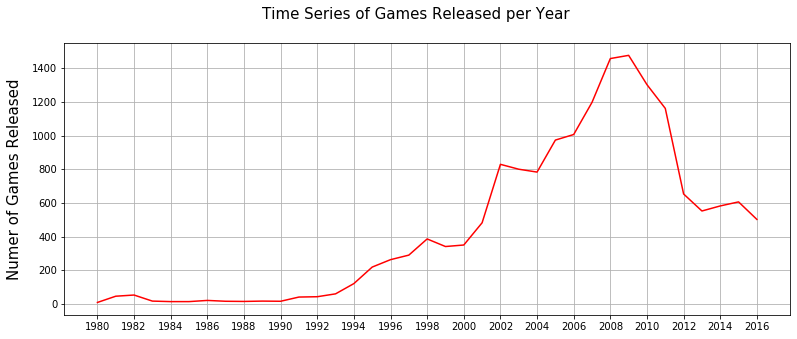

In [41]:
#Create sorted dictionary from value counts for year-of-release.
games_per_year = games['year_of_release'].value_counts().sort_index().to_dict()
print()

#Create line graph showing sales each year.
fig, ax = plt.subplots(figsize = (13, 5))
ax.plot(list(games_per_year.keys()), list(games_per_year.values()), color='red')
plt.locator_params(axis='x', nbins=len(list(games_per_year.values())))
plt.suptitle("Time Series of Games Released per Year", fontsize=15)
ax.set_ylabel('Numer of Games Released', fontsize=15, labelpad = 10)
ax.grid()
plt.show()

2.1 Notes: From the above graph, we can see that the number of games released per year was steady and quite low between 1990 and 1992. After 1992, the number of games sold per year began increasing quickly; this is expected, as it coincides with the release of the Sony Playstation in 1994, the Nintendo 64 in 1996, and and the Gameboy Color in 1998, each of which was hugely popular. Games released per year peaked between 2008 and 2009, then sharply declined. This sharp decline has been explained by some as due to the financial crisis of the late 2000s, which saw video games as luxury items (see New York Times article titled 'Video Games Aren’t Recession-Proof'). After a decline in games released year over year from 2009 to 2013, video games released rose slightly between 2013 and 2015, just to dip again in 2016, which saw the lowest sales numbers since 2001.

Using this information, we can answer the following question: Calculating the number of games released in different years, is the data for every period significant?

Significance, here, is in relation to our 2017 advertising campaign. As such, we hold that not all periods represented in the graph are significant for our purposes. While it may be tempting to simply base our advertising campaign on data for games that were released within the years with the most releases, this would not necessarily provide us with an adequate means to forcast game sales and related information for 2017. This is because, as we saw in the previous section, a console's lifecycle is around 5 years. For this reason, we believe that the most significant years for our purposes should be those for the latest 5 years we have data on, which would be from 2011 to 2016. 

That being said, we would also argue that this period should be shortened to between 2012 and 2016. As we saw, game releases dropped sharply from 2009 to 2013, though the drop from 2012 to 2013 is less significant. This may be due to individuals recovering from the financial crisis and starting to spend more money on luxury items. If this is the case, then data from the post-crisis recovery period may provide us with the best perspective on potential game sales in 2017. 

### Analysis of Sales from Games Sold by Platform<a class="anchor" id='2.2'></a>

#### Visualize Total Sales for Each Platform<a class="anchor" id='2.2.1'></a>

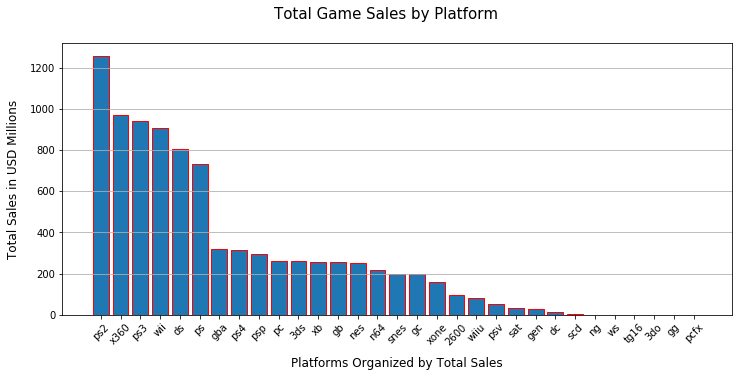


The platform with the greatest total game sales is the ps2.
The total sales in USD millions is: 1255.77



In [42]:
#Group DataFrame by platform and obtain total in sales for each platform.
platform_sales = games.groupby(games['platform'])['total_sales'].sum().round(2).reset_index()
platform_sales.sort_values(by=['total_sales'], inplace=True, ascending=False)

#Plot total game sales by platform.
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(platform_sales['platform'], platform_sales['total_sales'], edgecolor='red')
plt.xticks(rotation=45) 
plt.suptitle("Total Game Sales by Platform", fontsize = 15)
ax.set_ylabel('Total Sales in USD Millions', fontsize=12, labelpad = 10)
ax.set_xlabel('Platforms Organized by Total Sales', fontsize=12, labelpad = 10)
plt.grid(axis='y')
plt.show()

print()

#Print platform name and total sales number for platform with greatest sales total. 
print("The platform with the greatest total game sales is the {}.".format(platform_sales.iloc[0]['platform']))
print("The total sales in USD millions is: {}\n".format(platform_sales.iloc[0]['total_sales']))

2.2.1 Notes: From the above bar chart, we can see that the Sony Playstation 2 was, by far, the platform with the highest number of total sales from games. Interestingly, it outperformed the newer Playstation models by quite a large margin. Perhaps this is due to the Playstation 2 being the best-selling console of all time (ING Entertainment reports that it sold approximately 159 million unites). Being the most sold console, it is reasonable to expect that more games were sold for the Playstation 2 than any other console. Nonetheless, this graph is skewed in favor of older consoles, as newer consoles may not have been around as long as an older version and, therefore, may not have had the same number of years for which games could be released. That being said, we believe that it would be more accurate to judge a console's popularity by it's average yearly game sales. Nonetheless, for our present purposes, the current calculation is sufficient.
    
In the next subsection, we will look at the sales distribution for the Playstation 2 by year.

#### Visualize Yearly Total Sales for the Playstation 2<a class="anchor" id='2.2.2'></a>

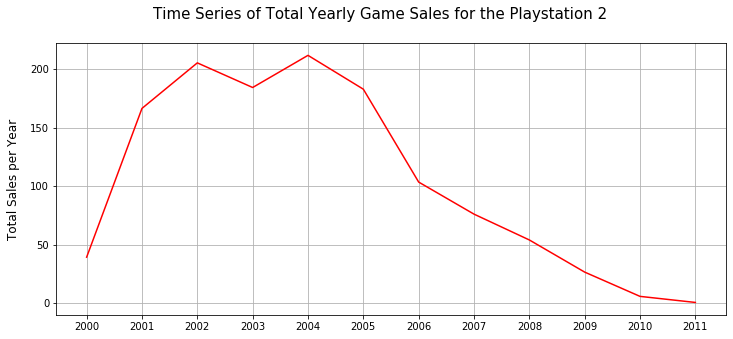

In [43]:
#Build a distribution based on data for each year of ps2 game sales. 
ps2 = games.loc[games['platform'] == 'ps2']
ps2_sales = ps2.groupby(ps2['year_of_release'])['total_sales'].sum().round(2).reset_index()
print()

#Create line graph showing total sales each year.
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(ps2_sales['year_of_release'], ps2_sales['total_sales'], color='red')
plt.suptitle("Time Series of Total Yearly Game Sales for the Playstation 2", fontsize=15)
plt.xticks(np.arange(min(ps2_sales['year_of_release']), max(ps2_sales['year_of_release'])+1, 1.0))
ax.set_ylabel('Total Sales per Year', fontsize=12, labelpad = 10)
ax.grid()
plt.show()

2.2.2 Notes: The Playstation 2 was released in October 2000. Naturally, the number of games sold for a console would increase in the short term after the console is released, which means that the total sales for games would increase after a console's release. This is clearly represented in the graph, where there is an increase in total sales from games between 2000 and 2002. Sale numbers fluctuate, though not wildly, between 2002 and 2005, and then sharply drop. The last games released for the Playstation 2 for which we have data were released in 2011.

#### Visualize Yearly Game Sales for 10 Most Popular Platforms<a class="anchor" id='2.2.3'></a>

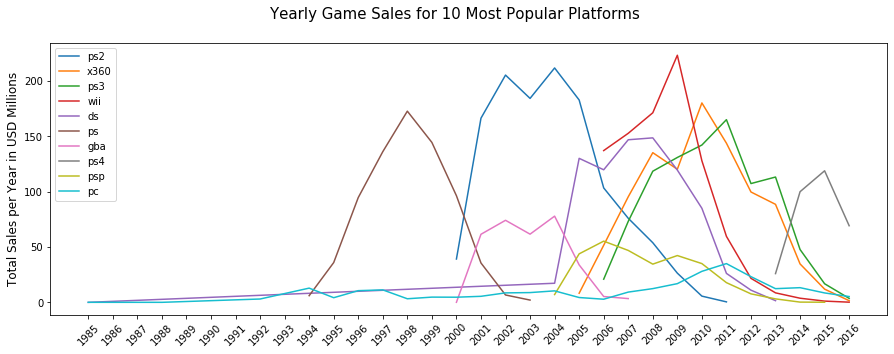

In [44]:
#Get list of 10 most popular platforms based on total for game sales. 
most_popular = platform_sales[:10]['platform'].to_list()

#Use for loop to plot time series for yearly sales for each of the 10 most popular platforms.
plt.figure(figsize = (15, 5))
for console in most_popular:
    xmin = 2016
    console_df = games.loc[games['platform'] == console]
    console_sales = console_df.groupby(console_df['year_of_release'])['total_sales'].sum().round(2).reset_index()
    plt.plot(console_sales['year_of_release'], console_sales['total_sales'], label=console)
    if min(console_sales['year_of_release']) < xmin:
        xmin = min(console_sales['year_of_release'])
plt.legend()
plt.suptitle("Yearly Game Sales for 10 Most Popular Platforms", fontsize=15)
plt.xticks(np.arange(xmin, max(games['year_of_release'])+1, 1.0), rotation=45)
plt.ylabel('Total Sales per Year in USD Millions', fontsize=12)
plt.show()

2.2.3 Notes: From the above graph, we can see that most of the 10 most popular consoles by total game sales no longer have games being released. In fact, from this graph it would appear that the ps4 was the console with the greatest game sales in 2016. This, however, is misleading, as the consoles released around 2016 might not have garnered enough from game sales make our top 10 list, which was organized according to total sales for each console. For this reason, it would be better, for our purposes, to examine the consoles for which games were still being released in 2016.

It's also important to note an off value that appears for the Nintendo DS. The graph shows a sales value for the DS in 1985. This is clearly wrong, as the DS was not released until 2004. As such, we will delete any rows where Nintendo DS has a 'year_of_release' value earlier than 2004.

In [45]:
indexDS = games.loc[(games['platform'] == 'ds') & (games['year_of_release'] < 2004)].index
games = games.drop(index=indexDS)
games.reset_index(inplace=True, drop=True)

#### Calculate the Average Lifespan of a Console<a class="anchor" id='2.2.4'></a>

In [46]:
#Use for loop to get average console age. 
console_lifespans = []

for console in games['platform'].unique():
    if console == 'pc':
        pass
    else:
        platform_years = games.loc[games['platform'] == console]
        lifespan = platform_years['year_of_release'].max() - platform_years['year_of_release'].min()
        console_lifespans.append(lifespan)

#Calculate the mean lifecyle of console from mean of each year.
print("A console's average lifecycle is {} years".format((mean(console_lifespans)).round(2)))

A console's average lifecycle is 6.2 years


2.2.4 Notes: In this subsection, we calculated the average lifespan of a console. To do so, we looped through each console represented in 'platform' column and subtracted the last year a game was released for the console from the first year a game was released for the console. We then took the average of all lifespans. Importantly, we excluded 'pc' from the calculation, which stands for 'personal computer'. From the graph in subsection 2.2.3, pc games have been around for decades. We believe that 'pc' is an outlier, as it does not denote a specific console, but rather a whole range of machines that can be used to play games. 

With 'pc' excluded from out calculation, we found that the average lifespan of a console is approximately 6.2 years. This is quite close to the lifespan of 5 years that we stated earlier, which results from a study at the University of Vienna. This difference may be due to what the individuals conducting the study considered to be consoles. For example, they may have limited their study to non-handheld devices, which would have resulted in their considering fewer consoles than we are currently. Moreover, they may have limited the timeframe in which they calculated lifecycles to include only modern gaming consoles. Whatever the case, an average lifecycle of approximately 6 years appears to be in line with the yearly gamesales graph for the most popular devices in subsection 2.2.3.

### Intermediate Conclusion - Choosing Data Subset<a class="anchor" id='2.3'></a>

In the above subsections, we calculated the total sales for each platform, visualized the yearly game sales for the 10 most popular platforms, as well as the total number of games released per year, and calculated the average lifespan of a console. In doing so, we found that the total number of new games released per year dropped sharply between 2009 and 2012, which we believe is the result of the financial crisis of the late 2000s. Since 2012, game releases have been roughly steady.

Regarding the 10 most popular platforms, the Playstation 2 is by far the most popular console, followed by the Xbox 360, the Playstation 3, and the Nintendo Wii. From this ranking, we can see that the most popular consoles are those released on or after the year 2000, which is when the Playstation 2 was released. 

Finally, we calculated that the average lifecycle of a console is approximatly 6.2 years. This calculation excludes personal computers, as we considered the category to be an outlier.

Taking these points into consideration, it is clear that in order to properly plan an effect advertising campaign for 2017, we will have to exclude a portion of our data. For example, since we wish to essentially forecast which games, or types of games, will most likely be hits in the coming year, we should not consider data for consoles that no longer had games being released for them in 2016. Given that newer consoles usually boast better graphics and processors, it may be that one game genre performed poorly on now obsolete consoles but performs much better on newer consoles. By limiting out later analyses to a subset of the 'games' DataFrame that only contains data for consoles that still had games released for them in 2016, we can be more confident that our 2017 advertising campaign will target consoles that are not yet obsolete. This is not to say that all consoles with sales for 2016 will not be obsolete in 2017; however, by including all consoles with sales in 2016, we can assume that at least some of those consoles will not yet be obsolete in 2017. To further ensure that our game sales data will more appropriately represent the trends of the the post-2000's financial crisis, we will only consider data between the years of 2012 and 2016. As previously mentioned, game releases sharply declined between 2009 and 2012. Yearly releases since 2012 have been, for the most part, steady.

That being said, we will now create a new DataFrame that only includes data for those platforms for which games were released in 2016, and for the years between 2012 and 2016 (inclusive). For the remainder of this project, our analyses will be focused mainly around this new DataFrame.

In [47]:
#Create list of consoles with games released in 2016.
consoles_2016 = games.loc[games['year_of_release'] == 2016]['platform'].unique()

#Create new DataFrame containing data for consoles represented in consoles_2016, and for the years between 2012 and 2016 (inclusive).
new_games = games[(games['platform'].isin(consoles_2016)) & (games['year_of_release'] >= 2012)]

#Change 'year_of_release' data type to int.
new_games.year_of_release = new_games.year_of_release.apply(int)

print(new_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2691 entries, 16 to 16711
Data columns (total 12 columns):
name               2691 non-null object
platform           2691 non-null object
year_of_release    2691 non-null int64
genre              2691 non-null object
na_sales           2691 non-null float64
eu_sales           2691 non-null float64
jp_sales           2691 non-null float64
other_sales        2691 non-null float64
critic_score       1313 non-null float64
user_score         1528 non-null float64
rating             1595 non-null object
total_sales        2691 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 273.3+ KB
None


2.3 Note: As we can see, our 'new_games' DataFrame contains only 2,691 rows, which is much smaller than our original Dataframe with 16,715 rows. This, however, does not necessarily mean that we're missing integral data. Just as studying music trends in the 1850's would not give us a proper means of estimating music trends in the 1950's, gaming trends around the time the first consoles were released do not represent the current trends. As such, while our dataset may be skewed after having eliminated so much data from consideration, it is nonetheless skewed in such a way that benefits us - that is, we acquire a glimps of those trends that may continue into the year 2017.

### Current Platform Trends<a class="anchor" id='2.4'></a>

In this subsection, we are going to analyse game sales by vaious parameters. Our goal is to answer the following questions in relation to the platforms represented in the 'new_games' DataFrame:

* Which platforms are leading in sales? For which platforms are sales growing, and for which are sales shrinking? From these metrics, what are potentially the most profitable platforms?


* Are there significant differences in global sales of all games, broken down by platform? Are there significant differences in average sales on various platforms?


* Do user and professional reviews have any affect on game sales?


* Is there a significant difference in sales of the same game for different platforms?


* What are the most popular genres of games? Can any generalizations be made regarding genres with high and low sales?


#### Visalize Yearly Game Sales for Each Platform<a class="anchor" id='2.4.1'></a>

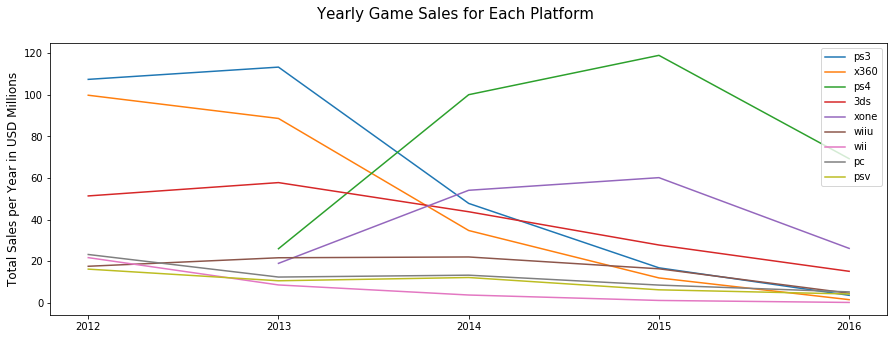

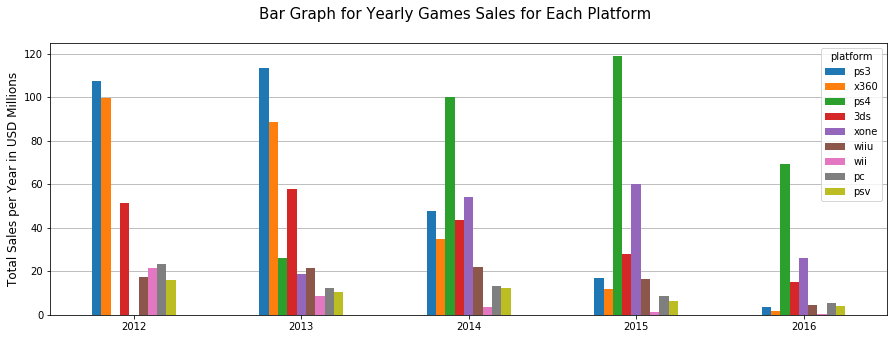

In [48]:
#Use for loop to plot time series of yearly sales for each platform.
plt.figure(figsize = (15, 5))
for console in new_games['platform'].unique():
    console_df = new_games.loc[new_games['platform'] == console]
    console_sales = console_df.groupby(console_df['year_of_release'])['total_sales'].sum().round(2).reset_index()
    plt.plot(console_sales['year_of_release'], console_sales['total_sales'], label=console)
plt.legend()
plt.suptitle("Yearly Game Sales for Each Platform", fontsize=15)
plt.xticks(np.arange(min(new_games['year_of_release']), max(new_games['year_of_release'])+1, 1.0), rotation=0)
plt.ylabel('Total Sales per Year in USD Millions', fontsize=12)
plt.show()

#Plot grouped bar graph of yearly sales for each platform.
games_pivot = pd.pivot_table(new_games, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
games_pivot = games_pivot[['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv']]
games_pivot.plot(kind='bar', figsize=(15, 5), zorder=3)
plt.suptitle("Bar Graph for Yearly Games Sales for Each Platform", fontsize=15)
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0)
plt.ylabel('Total Sales per Year in USD Millions', fontsize=12)
plt.xlabel('')
plt.show()

2.4.1 Notes: As can be seen from the above graphs, in 2012 and 2013 the Playstation 3 and Xbox 360 had the highest total game sales. However, this changed once the Playstation 4 and Xbox One were released in 2014; since then, the Playstation 4 had the highest yearly games sales, followed by the Xbox One. Additionally, since 2013, it appears that each platform other than the Playstation 4 and Xbox One had their total yearly sales decline year over year. Given the above graphs, we believe that the most effective gaming advertisement campaign for 2017 would taget games for the Playstation 4, Xbox One, or the Nintendo 3DS, which was 3rd highest in yearly sales in 2016.

#### Create Boxplot to Visualize Global Game Sales by Platform<a class="anchor" id='2.4.2'></a>

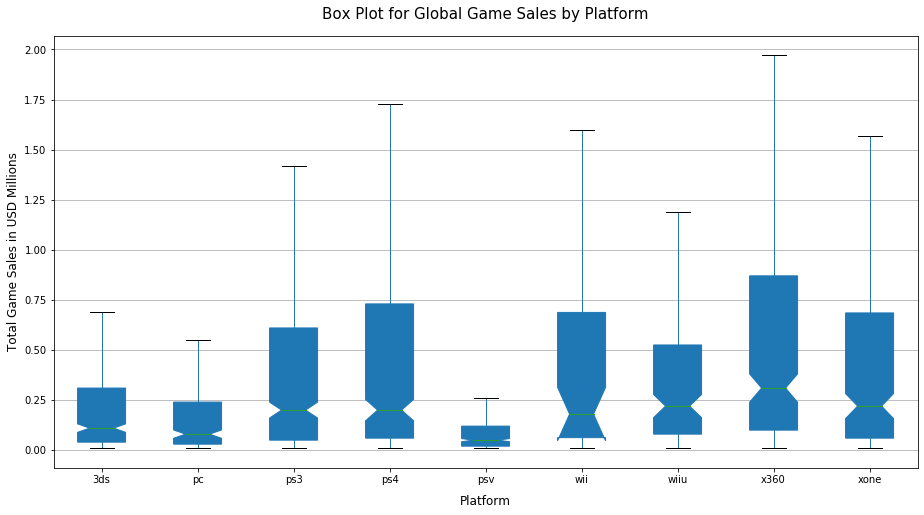

In [49]:
#Create boxplot with consoles as columns.
box = new_games.boxplot(column=['total_sales'], by='platform', figsize = (15, 8), notch=True, showfliers=False, patch_artist=True)
plt.suptitle("Box Plot for Global Game Sales by Platform", fontsize=15, y=.95)
plt.ylabel('Total Game Sales in USD Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12, labelpad = 10)
plt.grid(axis='x')
plt.title('')
plt.show()

2.4.2 Notes: The above boxplot allows us to visualize the range of 'total_sales' values for games for each platform. With it, we can easily compare the median 'total_sales' value for games for different platforms. Along these lines, it appears that the median 'total_sales' value for games for the Playstation Vita is the lowest and the median value for games for the Xbox 360 is highest, and by quite a substantial amount. 

The boxplot we are using is notched to a 95% confidence interval. This means that we can be 95% confident that, based on the sample size for each console, the true median value for 'total_sales' for games for each platform lies within the notched interval. Additionally, according to Graphical Methods for Data Analysis (Chambers, 1983), when the confidence intervals for two box plots do not overlap, there is strong evidence (95% confidence) that their medians differ. Accordingly, we can be quite confident that, for example, the median value for 'total_sales' for games for the Playstation vita indeed differs from the median for games for the Playstation 3. 

Regarding the significance of the difference in 'total_sales' values for each platform, it may be argued that, at first blush, the most sigificant difference is between the Playstation Vita and the Xbox 360. For example, the difference in median median 'total_sales' values for games is greatest between the two consoles. Additionally, the Playstation Vita's range of 'total_sales' values is the smallest on the graph, whereas the Xbox 360 has the largest range. That being said, to test whether the difference in 'total_sales' values between the two platforms is significant, we will look at the mean values for both platforms in the next subsection and conduct a two-sample t-test.

#### Test Significance of Difference Between Playstation Vita & Xbox 360<a class="anchor" id='2.4.3'></a>

##### Calculate Measures of Location for 'total_sales' Values<a class="anchor" id='2.4.3.1'></a>

In [50]:
#Get list of 'total_sales' values for Playstation Vita and Xbox 360 Platforms.
psv_sales = (new_games.loc[new_games['platform'] == 'psv']['total_sales']).round(3).to_list()
xbox360_sales = (new_games.loc[new_games['platform'] == 'x360']['total_sales']).round(3).to_list()

#Create DataFrame with mean, median, variance, and standard deviation for total_sales for both consoles.
psv_vs_xbox369 = {'Mean': [np.mean(psv_sales), np.mean(xbox360_sales)],
                'Median': [np.median(psv_sales), np.median(xbox360_sales)],
                'Variance': [np.var(psv_sales), np.var(xbox360_sales)],
                'Standard Deviation': [np.std(psv_sales), np.std(xbox360_sales)],
               }
minutes_df = pd.DataFrame(psv_vs_xbox369, ["Playstation Vita", "Xbox 360"])
display(minutes_df)

,Mean,Median,Variance,Standard Deviation
Playstation Vita,0.120000,0.05,0.041061,0.202636
Xbox 360,0.810068,0.31,2.921142,1.709135


2.4.3.1 Notes: From the above DataFrame, we can see that the mean 'total_sales' value for games for the Xbox 360 is greater than the mean value for the Playstation Vita. In fact, the value of all measures for the 'total_sales' data is greater for the Xbox 360 than the Playstation Vita. This is unsurprising, as we could infer as much from the boxplot in subsection 2.4.2. Overall, it appears that the 'total_sales' values for Xbox 360 games are spread much further from the mean than values for Playstation Vita games. We can confirm this with the boxplot - the interquartile range for values for the Xbox 360 is much larger than the interquartile range for Playstation Vita values, as are the ranges of values above and below the quartiles.

##### Formulate Null and Alternative Hypotheses<a class="anchor" id='2.4.3.2'></a>

Based on the boxplot and our calculations, one might conclude that there is a significant difference between the mean 'total_sales' values for Xbox 360 and Playstation Vita games; however, to justify this position one must determine whether or not we can reject the relevant null hypothesis. For our present purposes, we will consider the following hypotheses:

* Null Hypothesis [*H0*]: There is no difference between the mean value for 'total_sales' between games for the Xbox 360 and Playstation Vita.


* Alternative Hypothesis [*HA*]: The average 'total_sales' values for Xbox 360 games is different from that of Playstation Vita games.

##### Test the Null Hypothesis<a class="anchor" id='2.4.3.3'></a>

In [51]:
#Create ttest_ind function - we will use it again later.
def two_sample_ttest(samp1, samp2, alpha):
    results = st.ttest_ind(samp1, samp2)
    print('The p-value is: {}'.format(results.pvalue))
    if (results.pvalue < alpha) :
        print("\nAssuming the null hypothesis is true, the observed difference in means is highly unlikely.")
        print("Therefore, we reject the null hypothesis.")
    else:
        print("\nThe observed difference in means is not highly unlikely on the assumption that the null hypothesis is true.")
        print("Therefore, we do not reject the null hypothesis")
        
#Run a two-sample t-test on the 'total_sales' values for the Playstatin Vita and Xbox 360.
two_sample_ttest(psv_sales, xbox360_sales, .05)

The p-value is: 2.3675425859535243e-15

Assuming the null hypothesis is true, the observed difference in means is highly unlikely.
Therefore, we reject the null hypothesis.


2.4.3.3 Notes: Based on the result of our two-sample t-test, we reject the hypothesis that there is no difference in the mean 'total_sales' value for Playstation Vita and Xbox 360 games. This is not to say that we can confirm that there is a difference; however, we may be justified in operating under the assumption that there is such a difference. Under this assumption, it would appear that, based on our calculations and the above boxplot, the mean 'total_sales' value for Xbox 360 games is greater than Playstation Vita games.

### Examination of Possible Affect of Reviews on Game Sales<a class="anchor" id='2.5'></a>

In this subsection, we will determine whether user and critic reviews have any noticeable affect on game sales. In doing so, we will limit our investigation into the console with the greatest number of combined game reviews. We will determine whether reviews have any noticeable affect on game sales using the Pearson correlation coefficient and scatterplots.

#### Determine Which Console has the Greatest Number of Reviews<a class="anchor" id='2.5.1'></a>

In [52]:
#Group new_games by console and get total user and critic reviews for each.
grouped_consoles = new_games.groupby('platform').agg({'user_score' : 'count', 
                                        'critic_score' : 'count'})

#Create a new column in the grouped DataFrame with total reviews for each console.
grouped_consoles['total_reviews'] = (grouped_consoles['user_score'] + grouped_consoles['critic_score'])

#Sort the DataFrame by total reviews.
grouped_consoles.sort_values(inplace=True, by='total_reviews', ascending=False)

#Add NaN Count for Each Column
nan_dict = {}
for i in grouped_consoles.index:
    nan_df = new_games.loc[new_games['platform'] == i]
    nan_count = nan_df['user_score'].isna().sum() + nan_df['critic_score'].isna().sum()
    nan_dict[i] = nan_count
grouped_consoles['nan_reviews'] = grouped_consoles.index.map(nan_dict)

#Determine perportion of total reviews to NaN reviews for each platform.
grouped_consoles['nan_perportion'] = (grouped_consoles['nan_reviews'] / (grouped_consoles['total_reviews'] + grouped_consoles['nan_reviews'])).round(2)

#Print the grouped DataFrame.
display(grouped_consoles)



,user_score,critic_score,total_reviews,nan_reviews,nan_perportion
platform,,,,,
ps4,257,252,509,275,0.35
ps3,283,214,497,489,0.50
x360,235,171,406,178,0.30
pc,206,198,404,96,0.19
xone,182,169,351,143,0.29
psv,131,108,239,585,0.71
3ds,117,106,223,585,0.72
wiiu,100,90,190,104,0.35
wii,17,5,22,86,0.80


2.5.1 Notes: From the above DataFrame, we can see that the Playstation 4 is the console with the greatest total number of reviews. We also see that 35 percent of the review values for Playstation 4 games are filled with NaNs. We calculated the NaNs in order to see whether it makes sense to chose to evaluate a console other than the one with the most reviews. Unfortunaly, the 'console' with the lowest percentage of NaN reviews is 'pc', which we earlier said we consider to be an ourlier platform; we consider it to be a suboptimal platform to use for present purposes as we don't consider it to be a gaming platform according to the common usage of the term. Other than 'pc', the Xbox 360 and Xbox One have fewer NaN reviews perpotionally than the Playstation 4. Since the Xbox 360 has been replaced with the Xbox One, we will not consider the former. This leaves us with either the Playstation 4 or the Xbox 360. 

We have decided to evaluate the affect of reviews on game sales for the Playstation 4 over the Xbox 360. While the latter has a small perportion of NaN reviews to non-NaN reviews, we believe that having over 100 additional reviews for Playstation 4 games would provide us with a more precise view of any possible affect that reviews may have on game sales.

#### Obtain Data Subset for Playstation 4<a class="anchor" id='2.5.2'></a>

In [53]:
#Create new DataFrame with subset.
ps4_games = new_games.loc[new_games['platform'] == 'ps4']

#Create new column with product of non-NaN reviews.
ps4_games['score_product'] = ps4_games['critic_score'] * ps4_games['user_score']



2.5.2 Notes: In this subsection, after creating a new DataFrame with only the information for Playstation 4 games, we also created a new column where the values are the product of non-NaN critic and user reviews. While this is not necessary for out task, we believe it might allow us to easier identify if high user and critic reviews have any affect on game sales. 

#### Obtain Pearson Correlation Coefficient for Reviews<a class="anchor" id='2.5.3'></a>

In [54]:
print('Correlation coefficients for column value relationships total_sales: \n')

#Print correlation seties for 'total_sales'.
print(ps4_games.corrwith(ps4_games['total_sales']))

Correlation coefficients for column value relationships total_sales: 

year_of_release   -0.235032
na_sales           0.928160
eu_sales           0.958157
jp_sales           0.527129
other_sales        0.998051
critic_score       0.406568
user_score        -0.031957
total_sales        1.000000
score_product      0.182217
dtype: float64


2.5.3 Notes: As we can see from the above list of Pearson correlation coefficients, the there is a medium positive correlation between critic_score and total_sales. Interestingly, there is essentially no (or a very low negative) correlation between user_score and total_sales. And, there is a greater, though still low, correlation between total_sales and score_product. 

Given this information, it appears that when it comes to reviews, critic_score has the greatest influence on the total_sales of a game. This is unsurprising, as studies have shown that professional reviews have a great affect on game sales (see, for example, the EEDAR/SMU study on rating affects on game sales). We found it interesting, however, that user's scores had virtually no effect on game sales. Perhaps this is due to users' scores being less trusted than those of professional game reviewers, or rather being based on one element that the user loves/hates than on the game as a while. Regarding the latter, we found that, for example, the recent Microsoft Flight Simulator game was riddled with 1-star reviews, and that many of these were not so much concerning the gameplay, but rather things like the size of the download. On Metacritic, we can see that the professional rating for flight simulator is 91, whereas the user score is 7.1. 

Whatever the reason is that users' scores do not noticeably correlate with game sales (at least as out dataset is concerned), we are happy to see that there is a medium correlation between sales and critic scores. 

#### Visalize the Data Using Scatterplots<a class="anchor" id='2.5.4'></a>

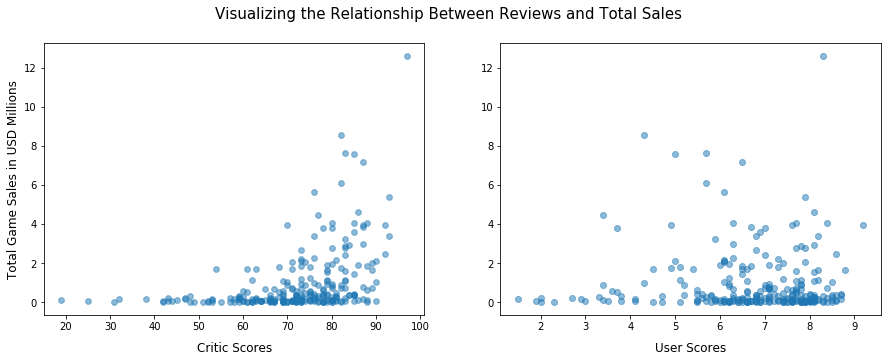

In [55]:
#Build two scatterplots to visualize relationships between game reviews and sales.
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15,5))
axs[0].scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha=.5, marker='8')
axs[1].scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha=.5)
plt.suptitle("Visualizing the Relationship Between Reviews and Total Sales", fontsize=15)
axs[0].set_ylabel("Total Game Sales in USD Millions", fontsize=12)
axs[0].set_xlabel('Critic Scores', fontsize=12, labelpad = 10)
axs[1].set_xlabel('User Scores', fontsize=12, labelpad = 10)
plt.show()

2.5.4 Notes: The above scatterplots were made to help visualize the relationship between game reviews and total sales. Whereas there appears to be a slight correlation in the scatterplot for critic scores, given the density of data it's hard to draw a conclusion. It appears that the data for user scores is even more scattered, and it's hard to identify any trend.

#### Correlation Conclusion<a class="anchor" id='2.5.5'></a>

Overall, we do not believe that an accurate assessment of correlation can be made simply by looking at the above scatterplots. Nonetheless, we are able to conclude that there exists one correlation between game reviews and total sales based on the Pearson correlation coefficients we calculated - that is, there is a medium positive correlation between 'critic_score' and 'total_sales' values. Given this finding, we would recommend forcusing our 2017 advertising campaign aroung games that have recently received high critic scores. 

### Examine Sales of Cross-Platform Games<a class="anchor" id='2.6'></a>

In the previous subsection, we looked at whether there is a correlation between reviews and game sales for the Playstation 4. Now, we will examine whether there is a difference in game sale totals for games that were released for both the Playstation 4 and another console (or consoles). By carrying out this analysis, we hope to determine whether it is advisable to prioritize advertising games for one platform over another when they are released across platforms.

#### Create Subset DataFrame<a class="anchor" id='2.6.1'></a>

In [56]:
#Create new DataFrame for games listed on Playstation 4 and at least one other console.
duplicate_games = new_games.loc[(new_games['name'].isin(ps4_games['name'])) & (new_games['name'].duplicated())].sort_values(by='name')

2.6.1 Notes: In this subection, we created a new DataFrame that contains only those games that are listed on both the Playstation 4 and at least one other console. Since our previous analysis was focused around the Playstation 4, we have decided to stick with this theme and compare cross-platform game sales against the same games on the Playstation 4. 

#### Visualize Data With Boxplot<a class="anchor" id='2.6.2'></a>

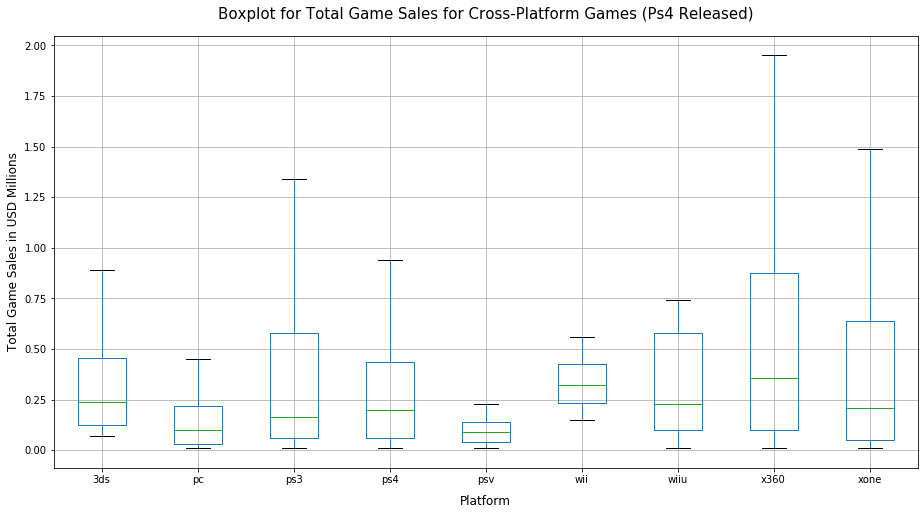

In [57]:
#Create boxplot to visualize total game sales by platform.
duplicate_games.boxplot(column=['total_sales'], by='platform', figsize = (15, 8), notch=False, showfliers=False)
plt.suptitle("Boxplot for Total Game Sales for Cross-Platform Games (Ps4 Released)", fontsize=15, y=.95)
plt.ylabel('Total Game Sales in USD Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12, labelpad = 10)
plt.title('')
plt.show()

2.6.2 Notes: In this subsection, we plotted a boxplot to visualize the 'total_sales' values for cross-platform games. Each game represented in this boxplot has been released for the Playstation 4 and at least one other platform. Using this boxplot, we can see that the median 'total_sales' values for games released on the Xbox 360 and Wii are higher than those values for all other platforms. In comparison to with the Playstation 4, it appears that the range of game 'total_sales' values for the Playstation 4 is smaller than the range of values for the Xbox 360, Xbox One, and Playstation 3. In the next section, we will calculate the revenue generate by sales of cross platform games for each platform in comparison to the same games released for the Playstation 4.

#### Calculate Revenue for Cross-Platform Games in Relation to Playstation 4<a class="anchor" id='2.6.3'></a>

In [58]:
#Use dictinary and for loop to calculate sales of cross-platform games in relation to the Playstation 4.
duplicate_game_sales = {}
for platform in duplicate_games['platform'].unique():
    platform_df = duplicate_games.loc[duplicate_games['platform'] == platform]
    ps4_same_games = duplicate_games.loc[duplicate_games['platform'] == 'ps4']
    
    plaftorm_total_games = platform_df.loc[platform_df['name'].isin(ps4_same_games['name'])]['total_sales'].sum().round(2) 
    ps4_same_game_total = ps4_same_games.loc[ps4_same_games['name'].isin(platform_df['name'])]['total_sales'].sum().round(2)
    duplicate_game_sales[platform] = [plaftorm_total_games, ps4_same_game_total]

#Create a DataFrame to display results.
duplicates_df = pd.DataFrame.from_dict(duplicate_game_sales)
duplicates_df.index = ['Console Sales', 'Ps4 Sales']
print("Total Cross-Platform Game Sales - Comparison with Playstation 4")
display(duplicates_df)

Total Cross-Platform Game Sales - Comparison with Playstation 4


,xone,wiiu,ps3,3ds,x360,ps4,pc,wii,psv
Console Sales,25.73,7.18,34.65,2.54,40.00,56.2,5.30,0.79,4.12
Ps4 Sales,44.68,17.45,22.52,6.49,29.13,56.2,30.37,3.53,12.81


2.6.3 Notes: Based on the calculations we carried out in this subsection, it appears that the Playstation 3 and Xbox 360, for the exact same cross-platform games (in relation to those released for the Playstation 4), generated greater sales revenues than the Playstation 4. While some may consider this as a measure of the popualrity of the consoles over the Playstation 4, this difference in revenue may be explained by the Xbox 360 and Playstation 3 being released years before the Playstation 4. With most modern consoles being backwards compatible, meaning that games made for older versions of the consoles may be played on the newer versions, those who already own a specific game would not need to buy the most recently released version if the new console they purchased is of the same make. 

Perhaps the most result from our calculation concerns the revenue generated by cross-platform game sales between the Xbox One and Playstation 4. Our calculations show that the same games generated greater revenue when sold for the Playstation 4 than the Xbox One, which is noteable since the consoles were released within weaks of each other. Without additional data, such as the cost per game or the number of units sold, we are not able to determine whether our results issue from Playstation 4 games being priced higher than Xbox One games or the Playstation 4 being a more popular console.

#### Cross-Platform Games Conclusion<a class="anchor" id='2.6.4'></a>

When compared with other consoles, it appears that the Playstation 4 generates the most revenue from the sale of cross-platform games. The exceptions to this finding are cross-platform game sales for the Playstation 3 and Xbox 360; we believe, however, that this is due to the Xbox 360 and Playstation 3 being released years before the Playstation 4, which means that some users who purchased the latter console after owning one of the former may have already owned the game and chosen not to purchase a newer copy. In any case, it appears that the Playstation 4 is one of the most popular consoles. This is confirmed by our graphs in subsection 2.4.1, which show's the Playstation 4 having the highest total sales numbers of any console between 2014 and 2016.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

Nothing to add: you demonstrated a real analytical approach to the data analysis trying to look wider and deeper, you are doing great!

### Examine Distribution of Games by Genre<a class="anchor" id='2.7'></a>

In this subsection, we will attempt to discern which are the most popular game genres. In doing so, we will examine which genre of games generate the most and least revenue. 

#### Visualize Distribution of Games by Genre<a class="anchor" id='2.7.1'></a>

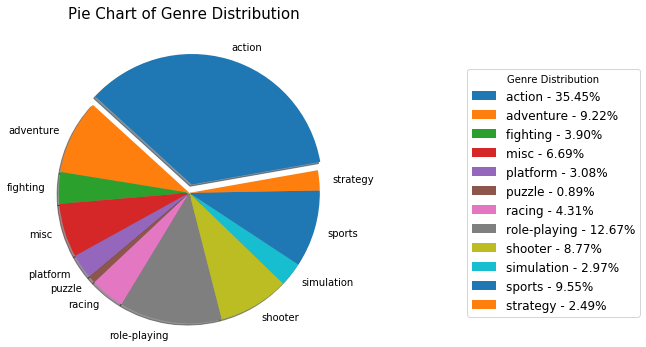

In [59]:
#Obtain count for number of games of each genre.
genre_sums = new_games.groupby(new_games['genre'])['name'].count()
total_games = genre_sums.values.sum()

#Set explode and label values for pie chart.
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels=[i for i in genre_sums.index]

#Create pie chart to visualize genre distribution.
patches, texts = plt.pie(genre_sums, explode=explode, radius=1.5, shadow=True, startangle=10, labels=labels)
plt.suptitle('Pie Chart of Genre Distribution',  fontsize=15, y=1.15)
plt.legend(patches, labels=['{} - {:.2%}'.format(l, s/total_games) for l, s in zip(labels, genre_sums.values)], title='Genre Distribution', loc="center left", bbox_to_anchor=(1.75, 0, 0, 1), fontsize=12)
plt.show()

2.7.1 Notes: From the above pie chart, we can see that action games clearly make up the largest share of games in our data set, followed by role-playing, sports, and adventure games. Based on this distribution, we could conclude that 'action' is, by and large, the most popular game genre, and 'puzzle' is the least popular genre. 

#### Visualize Game Sales Revenue by Genre<a class="anchor" id='2.7.2'></a>

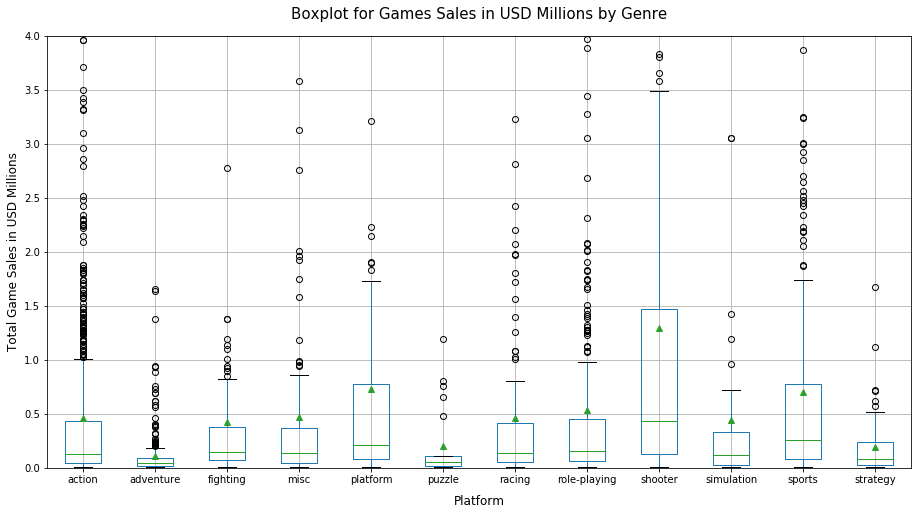

In [60]:
#Create boxplot to visualize distribtion of game revenue by platform.
new_games.boxplot(column=['total_sales'], by='genre', figsize = (15, 8), showfliers=True, showmeans=True)
plt.suptitle("Boxplot for Games Sales in USD Millions by Genre", fontsize=15, y=.95)
plt.ylabel('Total Game Sales in USD Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12, labelpad = 10)
plt.ylim(0, 4)
plt.title('')
plt.show()

2.7.2 Notes: From our above boxplot, we can see that the median 'total_sales' value for games of the 'shooter' genre is higher than that games of any other genre. Whereas in the previous subsection we noted that action games were the most popular, it appears that their mean 'total_sales' value is on the lower end of the spectrum. More surprisingly, we can see that the median 'total_sales' value for games of the 'adventure' genre is one of the lowest, if not the lowest, represented in the graph; this is surprising, as we saw in the pie chart that such games are the fourth most popular in terms of genre distribution in our data set. 

From the median values represented on this graph, one might be tempted to conclude that shooter games are the most profitable and that adventure and puzzle games are the least profitable. Indeed, if we go by the medians and means, the latter of which is denoted by green triangles, it would appear that this is the case. However, as we can see by the fliers, there are plenty of outliers for most of the genres; and, while a genre like 'action' might not have the highest mean or median 'total_sales' value, it seems to have many 'outlier' values that represent high-earning games, some of which go far beyong the range of values for shooter games. 

With that being said, when trying to determine what the most profitable genre is, we have to distinguish between the overall revenue generated by games of each genre and the mean/median revenue generated by games of each genre. Going by the latter, shooter games are clearly the most profitable - the mean and median 'total_sales' values for that genre is far substantial higher than that of other values. Now, to see if this genre actually generated the most revenue for the years represented in our data set, we will calculate 'total_sales' by genre in the next subsection.

#### Calculate Total Revenue Generated by Genre<a class="anchor" id='2.7.3'></a>

In [61]:
#Create pivot table to determine which genre has greatest cumulative 'total_sales' value.
genre_pivot = new_games.pivot_table(index='genre', values=['total_sales'], aggfunc=np.sum).sort_values(by='total_sales', ascending=False)
genre_pivot['rev_percent'] = (genre_pivot['total_sales'] / genre_pivot['total_sales'].sum()).round(2)
print(genre_pivot)


              total_sales  rev_percent
genre                                 
action             435.94         0.31
shooter            304.80         0.21
role-playing       181.20         0.13
sports             179.57         0.13
misc                84.15         0.06
platform            60.31         0.04
racing              53.59         0.04
fighting            44.13         0.03
simulation          35.34         0.02
adventure           27.79         0.02
strategy            12.63         0.01
puzzle               4.79         0.00


2.7.3 Notes: From the above pivot table, we can see that actions games generated the highest revenue in our dataset, followed by shooter, roleplaying, and sports games. In total, the revenue from games of these four genres made up approximately 78% of the revenue from all sales reported in the 'new_games' DataFrame. In keeping with the pie chart in subsection 2.7.1, games of the 'puzzle' genre make up the least percentage of sales represented in our DataFrame.

#### Revenue by Genre Conclusion<a class="anchor" id='2.7.4'></a>

In this section, we examined game sales revenue by genre. Based on the results of our examination, we are able to draw the following conclusions. 

* **Distribution**: 'Action' is by far the most popular genre in our dataset; such games make up approximately 35% of the games listed in the 'new_games' DataFrame. The second most popular genre is 'role_playing', which makes approximately 13% of the games. The least popular genre is 'puzzle', making up less than 1% of the games in the DataFrame. 


* **Game Sales per Genre**: As mentioned, one way to measure genre profitability is to consider the mean and median total sales values for games of each specific genre. By these measures, shooter games are the most profitable - that is, their mean and median total sales values are higher than those for games of any other genre. The shooter genre also has the greatest variance in sales values, which means that the values are spread quite far from the mean. Puzzle, strategy, and adventure games, on the other hand, appear to have the lowest median and mean total sales values. We found this interesting as adventure games are apparently the second most popular in our DataFrame.


* **Total Sales by Genre**: The second way mentioned to measure genre profitability is to calculate the total sales for all games of each genre within our data set. In doing so, we found that action games were by far the most profitable, generating 31% of all revenue from game sales. After action games, the 'shooter', 'role-playing', and 'sports' genres were most profitable. Together, gaems of these four genres generated 78% of the total revenue for games in our data set. By far, the least profitable genre was 'puzzle', generating less that .01% of the total revenue.


With these points considered, we believe that the best measures of the profitability for games of a given genre are the mean and median total sales values for each genre. Whereas calculating the total sales by genre allows us to see how much revenue was generated by games of each genre within a given timeframe, this tells us more about how popular games of a given genre are than how much one can expect to make by selling such games. By analyzing the mean and median total sales values for games of each genre, we are able to gain an understanding of how much revenue might be generated by a game of one genre over another. 

That being said, we would recommend that the 2017 advertising is primarily focused on shooter games. To diversify the advertisements, we would recommend to also consider games of the 'sports' and 'platform' genres, based on their mean and median total sales values. Finally, while the mean and median sales values for adventure games are quite low, we would nonetheless recommend including certain adventure games into the campaign, as there are many 'outlier' games of the genre that generated far more revenue than expected by considering outlier parameters using the interquartile range.

(Note: When discussing profitability, we are assuming that the cost associated with producing and marketing games across genres is not significantly different. On this assumption, genres that generate greater revenue may be regarded as generating greater profit. We understand, however, that this may not be the case and that costs associated with producing and marketing games for one genre might be substantially higher than for another. Unfortunately, without more data concerning production and marketing costs, we would not be able to precisely answer questions regarding the profitability of games.)

### Exploratory Data Analysis Conclusion<a class="anchor" id='2.8'></a>

At the beginning of this section, we outlined a number of question that we will attempt to answer. Having carried out all the required analyses, we can now provide succinct answers to each one.

**Calculating the number of games released in different years, is the data for every period significant?** 

Not all periods represented in the data are significant. Many periods include data for consoles that are long obsolete. Additionally, there was a large drop in sales after the financial crisis of the late-2000s; focusing on post-crisis sales would give us a better overview of the current state of the game market.


**How long does it generally take for new platforms to appear and old ones to fade?** 

A study that we cited from the University of Vienna found that a consoles lifecycle is around 5 years. Our own calculations show that, when removing personal computers from consideration, a console's average lifecycle is approximately 6.2 years. 


**What period of data should we use to determine which games are most likely to succeed in 2017?** 

We should limit our data to only include consoles for which games were still being released in 2016. Additionally, we should limit the timeframe to the 2012-2016 period (inclusive), as such data will appropriately represent the trends of the the post-2000's financial crisis.


**Which platforms are currently leading in sales? For which platforms are game sales growing and shrinking?** 

In 2016, the Playstation 4 and Xbox One were leading in sales. Since 2013, each platform for which games were released in 2016, other than the Playstation 4 and Xbox One, had their total yearly sales decline year over year. The Playstation 4 and Xbox One saw sales increase yearly from 2013 to 2015.


**Is there a significant difference in global sales of games broken down by platform? Is there a significant differnce in average sales between platforms?** 

Yes, there are significant differences in global game sales broken down by platform. For example, the median 'total_sales' values for Xbox 360 games is highest, while the value for Playstation Vita games is lowest. Between these two, we found the mean 'total_sales' value is much higher for Xbox 360 games than the Playstation Vita. We tested the hypothesis that there is no difference in the mean 'total_sales' values for games of each platform using a two-sample t-test; based on our p-value, we rejected this null hypothesis.


**Is there a correlation between user/critic reviews and game sales?** 

Based on Pearson correlation coefficients calculated, we did not find that there is a correlation, or at least not a statistically significant correlation, between user reviews and game sales. We did, however, find that there is a medium positive correlation between critic reviews and game sales.


**Of games released on multiple platforms, is there a significant difference in sales between platforms?** 

Yes, it appears that, in relation to the Playstation 4, there is a sigificant difference in sales between platforms for cross-platform games. When compared with other consoles, the Playstation 4 generates the most revenue from the sale of cross-platform games. The only exceptions to this finding are for the Playstation 3 and Xbox 360; this, however, could be due to the consoles being released years before the Playstation 4 and newer consoles generally being backwards compatible. 


**What are the most profitable game genres? Can we draw any conclusions based on the genre of a game?** 

In terms of mean and median 'total_sales' values for games for each genre, games of the 'shooter' genre are most profitable, followed by platform and sports games. In terms of overall revenue generated within the time-period represented in our data set, action games are the most profitable, having generated 31% of all revenue from game sales. The genre that generated the least revenue is 'puzzle'. 


Based on these findings, we would make the following recommendations regarding the 2017 advertising campaign:

1) If the campaign is to be based around games for certain consoles, we would recommend focusing on Playstation 4 and Xbox 1 games. Within the last years, games for these consoles generated, by far, the highest revenue. 

2) When deciding on which games to advertise, favor those games with high critic scores over low ones. As we saw, there is a medium positive correlation between critic score and game sales. If the 2017 campaign includes advertisements for a game that has not yet been critically reviewed, it would be beneficial, under the assumption that the game will receive a high score, to try and have multiple critics review the game prior to releasing any advertisements. 

3) If the campaign must decide for which platform a cross-platform game should be advertised, prioritize advertisements for the Playstation 4 version, as cross-platform games generally generate more revenue when sold for the Playstation 4 than for other consoles.  

4) Finally, in terms of individual game profitability by genre, focus on advertising shooter games. Do not advertise puzzle games.

## Regional User Profiles<a class="anchor" id='3'></a>

In this section, we will create regional user profiles with the data contained in the 'new_games' DataFrame. In doing so, we will focus on answering the following questions:

* What are the top 5 platforms in each region? Is there a variation in platform market share between regions?


* What are the top five game genres in each region?


* Do ESRB ratings affect sales in individual regions?

### Platform Popularity by Region<a class="anchor" id='3.1'></a>

In [62]:
#Create list of colors to be mapped onto pie chart wedges.
platform_list = list(new_games.platform.unique()) + list(new_games.genre.unique())
colors_dict = dict((i, 'C'+str(platform_list.index(i))) for i in platform_list)

#Define function to create Pie chart for revenue generated for games by platform for a specific region.
def pie_chart_region(region, title_region, platform1_genre2=0):
    if platform1_genre2 != 1 and platform1_genre2 != 2:
        return print("Error: You must enter a 1 or 2 for platform1_genre2.")
    
    elif platform1_genre2 == 1:
        #Obtain count for regional revenue for each platform.
        region_sum = new_games.groupby('platform')[region].sum().sort_values(ascending=False)
        title = 'Platform'
        explode_region = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
    
    else:
        #Obtain count for regional revenue for each genre.
        region_sum = new_games.groupby('genre')[region].sum().sort_values(ascending=False)
        title = 'Genre'
        explode_region = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

    region_total = region_sum.values.sum()
    labels_region=[i for i in region_sum.index]

    #Create pie chart to visualize sales by region.
    patches, texts = plt.pie(region_sum, explode=explode_region, radius=1.75, shadow=True, startangle=25, labels=labels_region, colors = [colors_dict[key] for key in labels_region], wedgeprops=dict(width=1.5, edgecolor='black'))
    plt.suptitle(title_region + ' - Game Sales by ' + title,  fontsize=15, y=1.25)
    plt.legend(patches, labels=['{} - {:.2%}'.format(l, s/region_total) for l, s in zip(labels_region, region_sum.values)], title='Game Sales by ' +title, loc="center left", bbox_to_anchor=(1.75, 0, 0, 1), fontsize=12)
    plt.show()

3.1 Notes: The above function will create a pie chart that represents the perportion revenue from games released either for each specific platform or specific genre within a specified region. We can use the pie chart to determine what the most popular platforms and genres are for each region. 

Initially, we intended to use this function only to vislaize the popularity of different consoles across regions; however, upon realizing that we could also use it to examine the regional popularity of game genres, we retroactively augmented the function.

#### North American Platform Popularity<a class="anchor" id='3.1.1'></a>

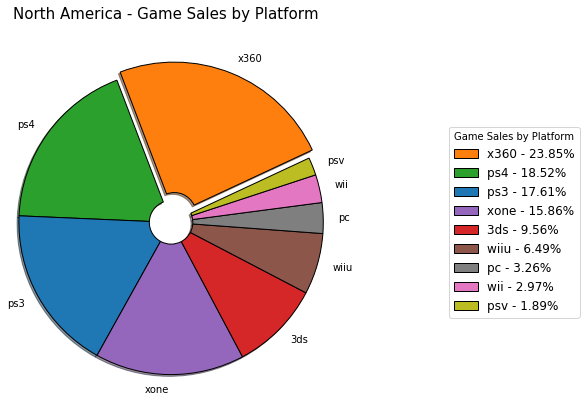

In [63]:
pie_chart_region('na_sales', 'North America', platform1_genre2=1)

3.1.1 Notes: From the above pie chart, we can see that the top-5 most popular consoles in North America, measured by the total revenue from games generated in North America, are the Xbox 360, the Playstation 4, the Playstation 3, the Xbox One, and the Nintendo 3DS. By the same measure, the Nintendo Wii and Playstation Vita are the least popular consoles in North America. Noteable, of all the revenue generated by games in North America, over 40% of that revenue was generated by games released for the Xbox 360 and Playstation 4.

#### European Platform Popularity<a class="anchor" id='3.1.2'></a>

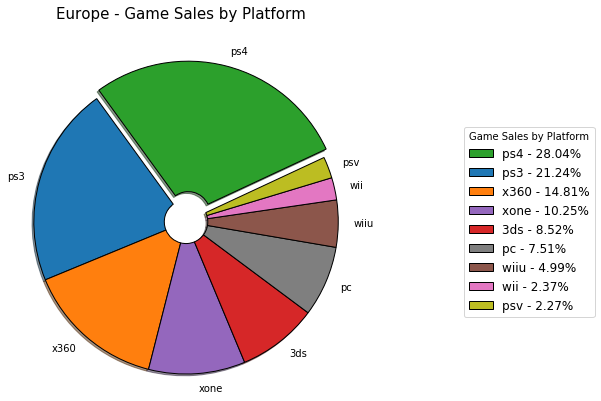

In [64]:
pie_chart_region('eu_sales', 'Europe', platform1_genre2=1)

3.1.2 Notes: From the above pie chart, we can see that the top-5 most popular consoles in Europe, measured by total revenue from games generated in Europe, are the Playstation 4, Playstation 3, Xbox 360, Xbox One, and Nintendo 3DS. In fact, nearly 50% of all revenue generated by game sales in Europe were for games released for the Playstation 3 and Playstation 4. Clearly, Playstation consoles are more popular in Europe than Xbox consoles. Also, as was the case with North America, the Nintendo Wii and the Playstation Vita are the least popular consoles. 

#### Japanese Platform Popularity<a class="anchor" id='3.1.3'></a>

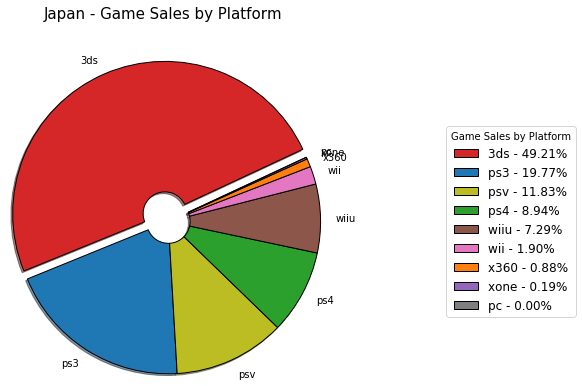

In [65]:
pie_chart_region('jp_sales', 'Japan', platform1_genre2=1)

3.1.3 From the above pie chart, we can see that the Nintendo 3DS is clearly the most popular console in Japan; of all revenue generated from game sales in Japan, nearly 50% came from games produced for the Nintendo 3DS. Other than the Nintendo 3DS, the most popular platforms are the Playstation 3, the Playstation Vita, the Playstation 4, and the Wiiu. From this information, it appears that gamers in Japan prefer portable consoles over plug-in ones. Interestingly, among the least popular platforms are the Xbox 360 and Xbox One, which we found to be among the most popular consoles in Europe and North America.

#### Regional Platform Popularity Conclusion<a class="anchor" id='3.4'></a>

Based on our regional breakdowns of game sales by platform, we can conclude that Playstation and Xbox consoles are the most popular consoles in North America and Europe. While the popularity of Xbox and Playstation consoles in North America is quite similar, Europeans clearly favor Playstation consoles over Xbox consoles. Finally, while Japanese gamers also favor Playstation consoles over Xbox consoles, they overwhelmingly prefer the Nintendo 3DS above all other consoles. 

Based on these findings, we would recommend that the 2017 advertising campaign be sensitive to the region(s) in which ads will be run. Along these lines, when chosing which games to advertise in Japan, for example, we would recommend strongly favoring Nintendo 3DS games over Xbox games.

### Genre Popularity by Region<a class="anchor" id='3.2'></a>

In this subsection, we will use the same function defined in subsection 3.1 to visualize the popularity of games by genre for each region according to the total sales revenues generated by games for each genre.

#### North American Genre Popularity<a class="anchor" id='3.2.1'></a>

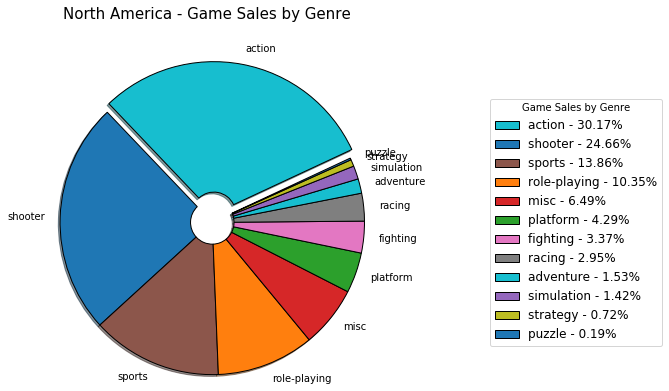

In [66]:
pie_chart_region('na_sales', 'North America', platform1_genre2=2)

3.2.1 Notes: From this pie chart we can see that 'action' and 'shooter' are the most popular game genres in North America, followed by 'sports', 'role-playing', and 'misc' genres. Combined, action and shooter games constitute over 50% of all revenue generated by game sales in North America. The least popular games are of the 'strategy' and 'puzzle' genres, which make up less than 1% of revenue generated by game sales in North America; this is unsurpising, and in line with our findings in subsection 2.7.3, in which we calculationed of the percentage of total revenue generated from games by each genre.

#### European Genre Popularity<a class="anchor" id='3.2.2'></a>

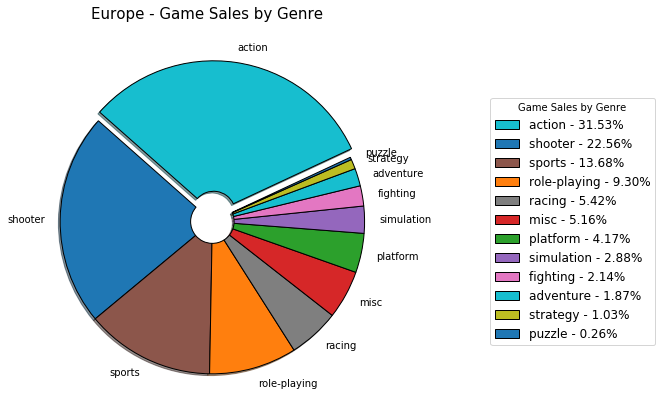

In [67]:
pie_chart_region('eu_sales', 'Europe', platform1_genre2=2)

3.2.2 From the above pie chart we see that, as with North America, 'action' and 'shooter' are the most popular game genres in Europe by far, followed by the 'sports', 'role-playing', and 'racing' genres. Action and shooter games make up over half of the total revenue generated by game sales in Europe. The main difference between North American and European genre popularities lies in games of the 'racing' genre; whereas games of this genre made up 2.95% of game sales in North America, it made up 5.42% of game sales in Europe. Finally, as with North America, games of the 'puzzle' and 'strategy' genres are the least popular in Europe.

#### Japanese Genre Popularity<a class="anchor" id='3.2.3'></a>

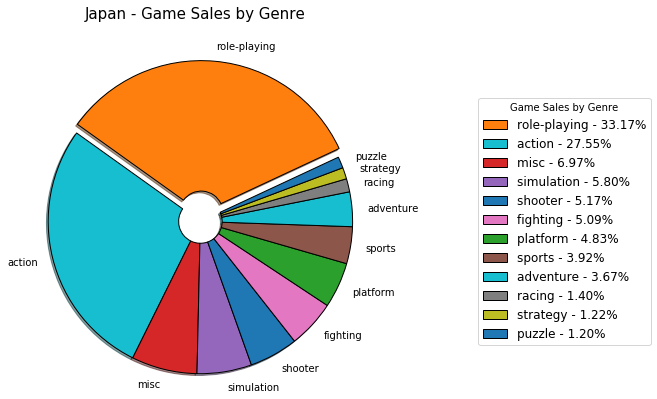

In [68]:
pie_chart_region('jp_sales', 'Japan', platform1_genre2=2)

3.2.3 Notes: For this pie chart we can see that genre popularity in Japan differs greatly from genre popularity in North America an Europe. In Japan, the top-5 most popular genres are 'role-playing', 'action', 'misc', 'simulation', and 'shooter'. Whereas role-playing games made up only around 10% of game sales in North America and Europe, such games generated over 30% of revenue from game sales in Japan. It also appears that action games are more popular in Japan than North America and Europe, though to a lesser degree than simulation games. Unsurprisingly, we find that, as with the previously examined regions, the least popular game genres in Japan are 'strategy' and 'puzzle'.

#### Regional Genre Popularity Conclusion<a class="anchor" id='3.2.4'></a>

Based on our regional breakdowns of game sales by genre, we can conclude that 'action' and 'shooter' are the most popular game genres in North America and Europe. While games of the 'action' genre are also popular in Japan, the most popular genre of games is 'role-playing; this genre ranked fourth most popular for North America and Europe. The most consistent game genres between regions are 'strategy' and 'puzzle', which generated the least percentage revenue from games sales for each region.

In line with our recommendations based on console popularity by region, we maintain that it is important for the 2017 advertising campaign to be sensitive to the region(s) in which ads will be run. This means prioritizing advertisements for games of specific genres over others depending on which region(s) the advertisements will be displayed.

### Regional Sales by ESRB Rating<a class="anchor" id='3.3'></a>

In this subsection, we will examine whether ESRB ratings have an effect on game sales in individual regions. To do this, we first need to revisit the missing values in the 'rating' column, which we initially left in place. Our idea was to wait to fill in the NaNs until we have decided upon a subset of data with which we would carry out most of our analyses; with this subset in place, the NaNs would be filled with values that are based on the subset of data we are working with, rather than the entire set of original data, which contained a vast amount of data that is not particularly relevant to our analyses.

#### Fill in NaNs for ESRB Ratings<a class="anchor" id='3.3.1'></a>

In [69]:
#Create dictionary to remap rating values to.
ratings = {'e': 1, 'e10+': 2, 't': 3, 'm': 4}
new_games.replace({'rating':ratings}, inplace=True)

In [70]:
null_rating_count = new_games.rating.isnull().sum()

#Fill in NaNs in 'rating' column by mean rating for genre and platform.
new_games['rating'] = new_games['rating'].fillna(new_games.groupby(['genre', 'platform'])['rating'].transform('mean').round())

#If NaNs remain, fill in leftover NaNs by mean rating for genre.
if new_games.rating.isnull().sum() > 0:
    print("{} NaNs were replaced by mean rating for game genre & platform.".format(null_rating_count - new_games.rating.isnull().sum()))
    time.sleep(3)
    print("\nWe will try to fill in the {} leftover NaNs by mean rating for genre.".format(new_games.rating.isnull().sum()))
    new_games['rating'] = new_games['rating'].fillna(new_games.groupby(['genre'])['rating'].transform('mean').round())
    time.sleep(3)
    if new_games.rating.isnull().sum() > 0:
        print("\nThere are {} NaNs remaining.".format(new_games.rating.isnull().sum()))
    else:
        print("\nAll NaNs have been filled.")
else:
    print("\nAll NaNs have been filled.")


1083 NaNs were replaced by mean rating for game genre & platform.

We will try to fill in the 13 leftover NaNs by mean rating for genre.

All NaNs have been filled.


In [71]:
#Replace labels for rating.
ratings2= {y:x for x,y in ratings.items()}
new_games.replace({'rating':ratings2}, inplace=True)

3.3.1 Notes: In this subsection we attempted to fill in all the NaNs in the 'rating' column. To do so, we wanted to get the mean rating value for games grouped by genre and platform. In order to calculate the mean rating, we categorized the ratings by number from 1-4; these numbers correspond to the increasing age restrictions conveyed by the ratings. Once we replaced all ratings with integers, attempted to replace all NaNs with the mean rating for games grouped by genre and platform. We then checked to see if all the values were filled; for any remaining values, we attempted to fill them with the mean rating for games grouped by genre only. 

All NaNs were successfully filled.

#### Visualize Game Sales Revenue by Rating for Each Region<a class="anchor" id='3.3.2'></a>

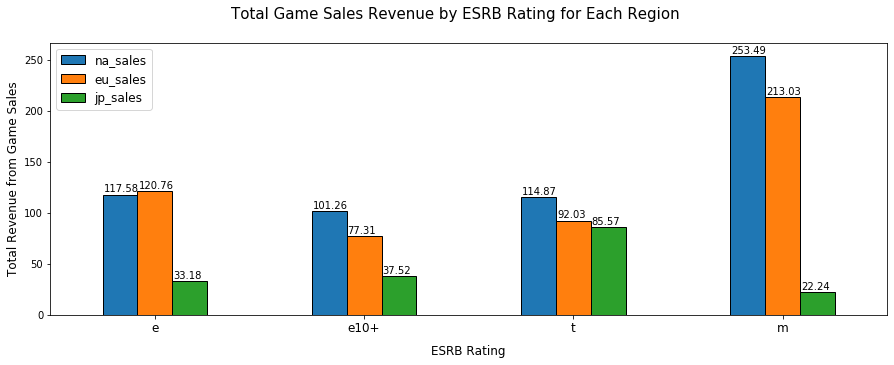

In [72]:
#Create groupby object for sales by rating for each region..
rating_order = ['e', 'e10+', 't', 'm']
rating_sales_group = new_games.groupby('rating', as_index=False)['na_sales', 'eu_sales', 'jp_sales'].sum().round(4)
rating_sales_group = rating_sales_group.set_index(rating_sales_group['rating']).loc[rating_order].reset_index(drop=True)

#Created grouped bar graph.
ax = rating_sales_group.plot(kind='bar', x='rating', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(15, 5), edgecolor='black')

#Annotate bars with values.
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x() +.005, p.get_height() + 2.5))

#Set additional properties of graph.
plt.suptitle("Total Game Sales Revenue by ESRB Rating for Each Region", fontsize=15)
plt.xlabel('ESRB Rating', fontsize=12, labelpad = 10)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Total Revenue from Game Sales', fontsize=12)
plt.legend(fontsize=12)
plt.show()

3.3.2 Notes: From the above chart we can see that there is a clear difference in revenue from game sales depending on ESRB ratings. In North America and Europe, games rated 'mature' generate substantially more revenue than games of any other rating. The exact opposite is true in Japan, where games rated 'mature' generate far less revenue than games of any other genre. 

After conducting some research, we learned that in Japan they use the CERO rating system, where mature games are rated either D or Z. For games rated CERO D, no one under 17 can purchase the game without adult permission; for games rated CERO Z, however, it is illegal for anyone under 18 to purchase them. Given that the ESRB ratings are not legally binding, it is not illegal in most (if not all) European and North American regions for underaged individuals to purchase mature games, nor is it illegal for an adult to purchase such games for minors. Given that it is illegal to purchase similarly rated games in Japan, we expect that this has a large impact on the sale of such games, assuming that the main consumers of games are under the age of 18. 

The rating that generates the least game sales in North America and Europe is e10+, which essentially stands for 'everyone aged 10 and above'. While such games generate the second most sales revenue in Japan, the total sales value is quite close to those for games rated e. 

#### Regional Sales by ESRB Rating Conclusion<a class="anchor" id='3.3.3'></a>

From our analysis of total sales by ESRB rating for each region, we have come to conclude that ESRB ratings do have a noticeable affect on game sales. This affect is most noticeable on games rated 'mature'. Such games generate far more revenue than games with other ratings in the North American and European regions; however, we found the exact opposite affect in Japan, where games rated 'mature' generated substantially less revenue than games of other ratings.

Given these results, we would recommend that when deciding which game(s) to focus on advertising in certain regions, one prioritize advertising 'mature' rated games in North America and Europe and forgo advertising such games in Japan.

### Regional User Profiles Conclusions<a class="anchor" id='3.4'></a>

In this section we set out to answer a number of questions regarding differences in consumer preferenecs across regions. Having carried out all the pertinent analyses, we can now provide the following succinct answers to each one.

**What are the top 5 platforms in each region? Is there a variation in platform market share between regions?**

There is, indeed, variation in platform market share between regions. In North American and Europe, the Playstation and Xbox consoles are the most popular; however, while the popularity of Playstation and Xbox consoles is quite similar in North America, Europeans appear to favor Playstation consoles. In Japan, while Playstation consoles are more popular than Xbox consoles, the Nintendo 3DS is by far the most popular gaming platform. What follows is a breakdown of the top-5 most popular platforms in each region:
* North America: Xbox 360, Playstation 4, Playstation 3, Xbox One, and Nintendo 3DS.
* Europe: Playstation 4, Playstation 3, Xbox 360, Xbox One, and Nintendo 3DS.
* Japan: Nintendo 3DS, Playstation 3, Playstation Vita, Playstation 4, and Wiiu
    
    
**What are the top five game genres in each region?** 

In North America and Europe, games of the 'action' and 'shooter' genres are the most popular. In Japan, 'role-playing' is the most popular game genre. What follows is a breakdown of the top-5 most popular game genres in each region:
* North America: Action, shooter, sports, role-playing, and misc.
* Europe: Action, shooter, sports, role-playing, and racing.
* Japan: Role-playing, action, misc, simulation, and shooter.
    
    
**Do ESRB ratings affect sales in individual regions?** 

Yes, there is a noticeable affect on total game sales by ESRB rating between regions. Most notably, games rated 'mature' generate the most revenue in North America and Europe, while such games generate the least revenue in Japan.

Based on our findings in each subsection, we offered various recommendations with regard to the 2017 advertising campaign, with the overarching recommendation being that advertisements should be sensitive to the region(s) in which they will be run, especially. This is to say that advertisements should be tailored to which types of games - in terms of platform, rating, and genre popularity - are most likely to generate the greatest revenue in each specific region. For example, while it would be ideal to advertise a mature-rated action game for the Playstation 4 in Europe, such an advertisement will likely generate less revenue from sales of the game in Japan than would an advertisement for a role-playing game for the Nintendo 3DS that is rated 'teen'. 

## Hypothesis Testing<a class="anchor" id='4'></a>

In this section, we will be testing the following two hypotheses:
    
* Hypothesis 1: The average user ratings of games released for the Xbox One and PC platforms are the same.


* Hypothesis 2: The average user ratings of games released for the Action and Sports genres are different. 

Note: In section 1 of this project, we opted not to fill in missing values in the 'user_score' column as we believed doing so might provide us with an inaccurate representation of preferences for some games. Nonetheless, we think it may be valuable to test the above hypothesis with these missing values filled. That being said, we will test each hypothesis twice - once without filling the missing values and once with the missing values filled.

### Obtain DataFrame Slices<a class="anchor" id='4.1'></a>

#### Obtain DataFrame Slices for Platform Comparison<a class="anchor" id='4.1.1'></a>

In [73]:
#Get slices of DataFrame for Xbox One and PC.
xone_pc = new_games.loc[(new_games['platform'] == 'xone') | (new_games['platform'] == 'pc')]
new_games_nan_filled = new_games.copy()

#Drop NaNs from first slice.
xone_pc.dropna(inplace=True)
xone_pc.reset_index(drop=True)

#Fill NaNs in second slice by platform and genre.
print('NaNs that need to be filled in new_games_nan_filled DataFrame: {}\n'.format(new_games_nan_filled.user_score.isnull().sum()))
new_games_nan_filled['user_score'] = new_games_nan_filled['user_score'] \
    .fillna(new_games_nan_filled.groupby(['platform', 'genre'])['user_score'].transform('mean'))
time.sleep(3)
print("We will attempt to fill NaNs with mean user score grouped by platform and genre.\n")
time.sleep(3)

#Check if all NaNs have been filled.
if new_games_nan_filled.user_score.isnull().sum() == 0 :
    print("All NaNs were filled.")
elif (new_games_nan_filled.user_score.isnull().sum() / len(new_games_nan_filled)) < .05:
    print("Remaining NaNs constitute less than 5% of data and will be dropped.")
    new_games_nan_filled.dropna(inplace=True, subset=['user_score'])
    new_games_nan_filled.reset_index(drop=True)
else:
    print('Remaining NaNs constitue more than 5%. Determine another way to fill them.')

xone_pc_noNan = new_games_nan_filled.loc[(new_games_nan_filled['platform'] == 'xone') | (new_games_nan_filled['platform'] == 'pc')]

NaNs that need to be filled in new_games_nan_filled DataFrame: 1163

We will attempt to fill NaNs with mean user score grouped by platform and genre.

Remaining NaNs constitute less than 5% of data and will be dropped.


#### Obtain DataFrame Slices for Genre Comparison<a class="anchor" id='4.1.1'></a>

In [74]:
#Get slices of DataFrame for action and sports games.
action_sports = new_games.loc[(new_games['genre'] == 'action') | (new_games['genre'] == 'sports')]
action_sports_noNaN = new_games_nan_filled.loc[(new_games_nan_filled['genre'] == 'action') | (new_games_nan_filled['genre'] == 'sports')]

#Drop NaNs from first slice.
action_sports.dropna(inplace=True)
action_sports.reset_index(drop=True);

4.1 Notes: In the above cells we created 4 DataFrames out of slices from the new_games DataFrame. Two of the DataFrames will be used to test the first hypothesis, and two the second. For each test, there is one DataFrame where missing 'user_score' values were dropped, and one where they were filled. By carrying out two t-tests for each hypothesis using two versions of each DataFrame, we will be able to see if filling in NaNs for user score had a great effect on the outcome of our t-tests.

### Create Function to Test Hypotheses<a class="anchor" id='4.2'></a>

In [75]:
#Function to run two-sample t-test on two arrays.
def hypo_test(samp1, samp2, samp1_label, samp2_label) :
    alpha = .05
    results = st.ttest_ind(samp1, samp2)
    pvalue = results.pvalue
    time.sleep(3)
    print("\nThe mean for " + samp1_label + " is approximately: {}".format(np.mean(samp1).round(3)))
    time.sleep(3)
    print("The mean for " + samp2_label + " is approximately: {}".format(np.mean(samp2).round(3)))
    time.sleep(3)
    print('\nThe p-value is: {}'.format(pvalue))
    time.sleep(3)
    if (pvalue < alpha) :
        print("\nAssuming the null hypothesis is true, the observed difference in means is highly unlikely.")
        time.sleep(3)
        print("Therefore, we reject the null hypothesis.")
    else:
        print("\nThe observed difference in means is not highly unlikely on the assumption that the null hypothesis is true.")
        time.sleep(3)
        print("Therefore, we do not reject the null hypothesis")

### Testing Hypothesis 1<a class="anchor" id='4.3'></a>

Given that the first hypothesis claims that the mean user scores for Xbox One and PC games are the same, we can treat this as the null hypothesis. As such, the alternative hypothesis would be that mean user scores for Xbox One and PC games are different. In the following cells, we will test the alternative hypothesis twice - once for 'user_score' values with NaNs removed, and once for 'user_score' values with NaNs filled.

In [76]:
print("Conducting two-sample t-test on mean user scores for Xbox One and PC games (NaNs removed)")

#Run two-sample t-test on series of user_scores from Xbox One games and PC Games
hypo_test(xone_pc.loc[xone_pc['platform'] == 'xone']['user_score'], 
          xone_pc.loc[xone_pc['platform'] == 'pc']['user_score'],
          'Xbox One game user scores', 'PC game user scores')

Conducting two-sample t-test on mean user scores for Xbox One and PC games (NaNs removed)

The mean for Xbox One game user scores is approximately: 6.538
The mean for PC game user scores is approximately: 6.454

The p-value is: 0.5991315923632393

The observed difference in means is not highly unlikely on the assumption that the null hypothesis is true.
Therefore, we do not reject the null hypothesis


In [77]:
print("Conducting two-sample t-test on mean user scores for Xbox One and PC games (NaNs filled)")

#Run two-sample t-test on series of user_scores from Xbox One games and PC Games
hypo_test(xone_pc_noNan.loc[xone_pc_noNan['platform'] == 'xone']['user_score'], 
          xone_pc_noNan.loc[xone_pc_noNan['platform'] == 'pc']['user_score'],
          'Xbox One games user scores', 'PC games user scores')

Conducting two-sample t-test on mean user scores for Xbox One and PC games (NaNs filled)

The mean for Xbox One games user scores is approximately: 6.586
The mean for PC games user scores is approximately: 6.469

The p-value is: 0.3494812832847981

The observed difference in means is not highly unlikely on the assumption that the null hypothesis is true.
Therefore, we do not reject the null hypothesis


4.3 Notes: Based on our calculations, we found that the mean user scores for Xbox One and PC games are quite similar, even with NaNs filled, though the mean score for Xbox Games is slightly higher. In carrying out two-sample t-tests, we found that the p-value is too large to reject the null hypothesis for both sets of data - that is, for the set with NaNs removed and the set with NaNs filled. Given the results of the tests, we do not reject the null hypothesis (i.e., that the average user ratings of games released for the Xbox One and PC platforms are the same).

### Testing Hypothesis 2<a class="anchor" id='4.4'></a>

Unlike the first hypothesis, our second hypothesis does not claim that two means are equal; instead, it claims that the average user ratings of games released for the 'action' and 'sports' genres are different. As such, this would constitute our alternative hypothesis. Our null hypothesis, in this case, is that the mean user scores for games of the 'action' and 'shooting' genres are the same. In the following cells, we will test the alternative hypothesis twice - once for 'user_score' values with NaNs removed, and once for 'user_score' values with NaNs filled.

In [78]:
print("Conducting two-sample t-test on mean user scores for action and sports games (NaNs removed)")

#Run two-sample t-test on series of user_scores from Xbox One games and PC Games
hypo_test(action_sports.loc[action_sports['genre'] == 'action']['user_score'], 
          action_sports.loc[action_sports['genre'] == 'sports']['user_score'],
          'action games user scores', 'sports games user scores')

Conducting two-sample t-test on mean user scores for action and sports games (NaNs removed)

The mean for action games user scores is approximately: 6.898
The mean for sports games user scores is approximately: 5.82

The p-value is: 8.979770704383313e-16

Assuming the null hypothesis is true, the observed difference in means is highly unlikely.
Therefore, we reject the null hypothesis.


In [81]:
print("Conducting two-sample t-test on mean user scores for action and sports games (NaNs filled)")

#Run two-sample t-test on series of user_scores from Xbox One games and PC Games
hypo_test(action_sports_noNaN.loc[action_sports_noNaN['genre'] == 'action']['user_score'], 
          action_sports_noNaN.loc[action_sports_noNaN['genre'] == 'sports']['user_score'],
          'action games user scores', 'sports games user scores')

Conducting two-sample t-test on mean user scores for action and sports games (NaNs filled)

The mean for action games user scores is approximately: 6.86
The mean for sports games user scores is approximately: 5.498

The p-value is: 1.1662330073158727e-57

Assuming the null hypothesis is true, the observed difference in means is highly unlikely.
Therefore, we reject the null hypothesis.


4.4 Notes: Based on our calculations, we found that the mean user scores for games of the 'action' and 'shooting' genres differ by approximately 1 point with NaNs removed and 1.4 points with NaNs filled. We found that the difference between the means is significant, whether the NaNs were removed or filled, based on the p-values obtained from our two-samples t-tests. According to these tests, we must reject the null hypothesis - that is, we must reject the proposition that the mean user scores for games of the 'action' and 'shooting' genres are the same.

### Hypothesis Testing Conclusion<a class="anchor" id='4.5'></a>

In this section we tested two null hypotheses. For each test, we used two sets of data - one with missing 'user_score' values dropped, and one with missing 'user_score' values filled. Regarding the first null hypothesis, which states that the average user ratings of games released for the Xbox One and PC platforms are the same, we found that it could not be rejected. We did, however, find that we should reject the second null hypothesis, which states that the mean user scores for games of the 'action' and 'shooting' genres are the same.

While finding that a null hypothesis should be rejected does not prove that the alternative hypothesis is true, it does indicate that the data favors the alternative hypothesis. As such, if individuals working on the 2017 advertisement campaign were to decide between advertising an action game or a sports game based on average user scores for games of each genre, they would be justified in favoring the action game based on the results of this test. 

It's important to note here that the significance level we chose to test with is 5%. We made this choice because it is generally accepted that such a significance level is reliable at precluding Type I and Type II errors. A Type I error occurs when you reject a null hypothesis that is true; a Type II error occurs when you fail to reject a null hypothesis that is false. When significance levels are set too low, one runs the risk of committing Type I errors; the inverse is true for Type II errors. In order to avoid committing such errors, we have chosen the significance level of 5%, which, as previously mentioned, is commonly regarded as an appropriate level to reduce the potential for both type of errors. 

## Conclusion<a class="anchor" id='5'></a>

The overall goal of this project has been to identify patterns and trends that we can use to plan an effective game-advertisement campaign for 2017. Based on our various analyses, we've been able to conclude the following:

* Not all data included in the original data set is relevant to our task. Given that most platforms included in the dataset are long obsolete, we believe that it is most appropriate to focus on those platforms for which games were still being released in 2016. Additionally, we concluded that, to better reflect the current game market, it would be best to examine data for games released after, or near the end, of the late-2000s financial crisis.


* Based on our calculations, it takes around 6 years for a platform to become obsolete.


* Currently, the Playstation 4 and Xbox One are leading in sales. Since 2013, each platform for which games were released in 2016, other than the Playstation 4 and Xbox One, had their total yearly sales decline year over year. The Playstation 4 and Xbox One saw sales increase yearly from 2013 to 2015.


* There are significant differences in global game sales broken down by platform. For example, the median 'total_sales' values for Xbox 360 games is highest, while the value for Playstation Vita games is lowest. Between these two, we found the mean 'total_sales' value is much higher for Xbox 360 games than the Playstation Vita. We tested the hypothesis that there is no difference in the mean 'total_sales' values for games of each platform using a two-sample t-test; based on our p-value, we rejected this null hypothesis.


* While there is no correlation between user ratings and game sales, we found that there is a medium positive correlation between critic ratings and game sales.


* For cross-platform games released on the Playstation 4, which was the most popular console in 2016, the Playstation 4 version of the game tends to generate more revenue than versions for other platforms. The exception to this are for Playstation 3 and Xbox 360 versions of the same game; however, we believe this may be explained by the Playstation 4 being a newer consoles and consoles often being backwards compatible.


* In terms of mean and median 'total_sales' values for games for each genre, games of the 'shooter' genre are most profitable, followed by platform and sports games. In terms of overall revenue generated within the time-period represented in our data set, action games are the most profitable, having generated 31% of all revenue from game sales. The genre that generated the least revenue is 'puzzle'.


* Xbox and Playstation games are, by far, the most popular in North America and Europe. In Japan, games released for the Nintendo 3DS make up the largest market share (approximately half).


* In North America and Europe, games of the 'action' and 'shooter' genres are the most popular. In Japan, 'role-playing' is the most popular game genre. Along similar lines, 'mature' rated games generate, by far, more revenue than games of other genres in North America and Europe; however, in Japan such games generate the least revenue of all genres represented in our data set.


* The difference in mean user ratings between games for the Xbox One and PC is not significant enough to warrant rejecting the null hypothesis - that is, that there is no difference in mean user ratings for for each platform. That being said, the difference in mean user ratings for games of the 'shooter' and 'action' genres is substantial enough to warrant rejecting the relevant null hypothesis, which holds that there is no difference in mean user ratings between those genres. 

Based on these findings, we offered several recommendations to ensure that the 2017 advertising campaign is a success. These recommendations may be summarized as follows:

1) For advertising campaigns within North America and Europe, it would be best to focus on 'mature' rated action and shooter games produced for the Playstation 4 or Xbox One. For campaigns in Japan, it would be best to focus on 'teen' rated role-playing games produced for the Nintendo 3DS. 

2) Favor advertising games with high critic scores over those with low (or no) scores. If a game has not been released yet and advertisers expect it to be a 'hit', it would be in their best interest to try to get the game critially reviewed prior to releasing an advertisement. If the game doesn't receive high scores, it might be best to look towards different games that do receive higher scores.

3) If advertisers must decide which version of a cross-platform game they should advertise, they should chose the Playstation 4 version, if available. 

4) With regard to games by genre, advertisers should focus on shooting and action games and steer clear of puzzle games. If the choice is between an action game or a sports game, we believe it would be more profitable to advertise the action game. 

Assuming that advertisers receive a portion of the profits generated by sales of the games they advertise, we believe that taking the abovementioned points into consideration and following the recommendations when planning an advertising campaign would help advertisers chose games that may potentially become 'hits'. 